In [1]:
import pymystem3
import os
import spacy
import fitz
import nltk
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import codecs
import numpy as np
from nltk.corpus import brown
from past.builtins import xrange
from libtiff import TIFF
import artm

nltk.download('punkt')

## ТМ для файла pdf

In [50]:
# Путь к файлам pdf
path='./doc_for_TM/pdf/'

In [ ]:
# Переводим все pdf в txt формат
for file in range(len(os.listdir(path))):
    pdf_document = path+'/'+str(file+1)+'.pdf'  
    doc = fitz.open(pdf_document) 
    text=''
    for i in range(doc.pageCount):
        page1 = doc.loadPage(i)  
        page1text = page1.getText("text")
        #print(page1text)
        text=text+page1text
    
    f_new = open('./doc_for_TM/txt/'+str(file+1)+'.txt','w')  # открытие в режиме записи
    f_new.write(text)
    f_new.close()

In [ ]:
# Стоп слова
stop_words= nltk.corpus.stopwords.words('russian')
mystem = pymystem3.Mystem()
path='doc_for_TM/txt'
f=open('new.txt','a') # создаем файл "мешок слов"
x=[];y=[]; s=[]

doc_for_TM/txt/1.txt


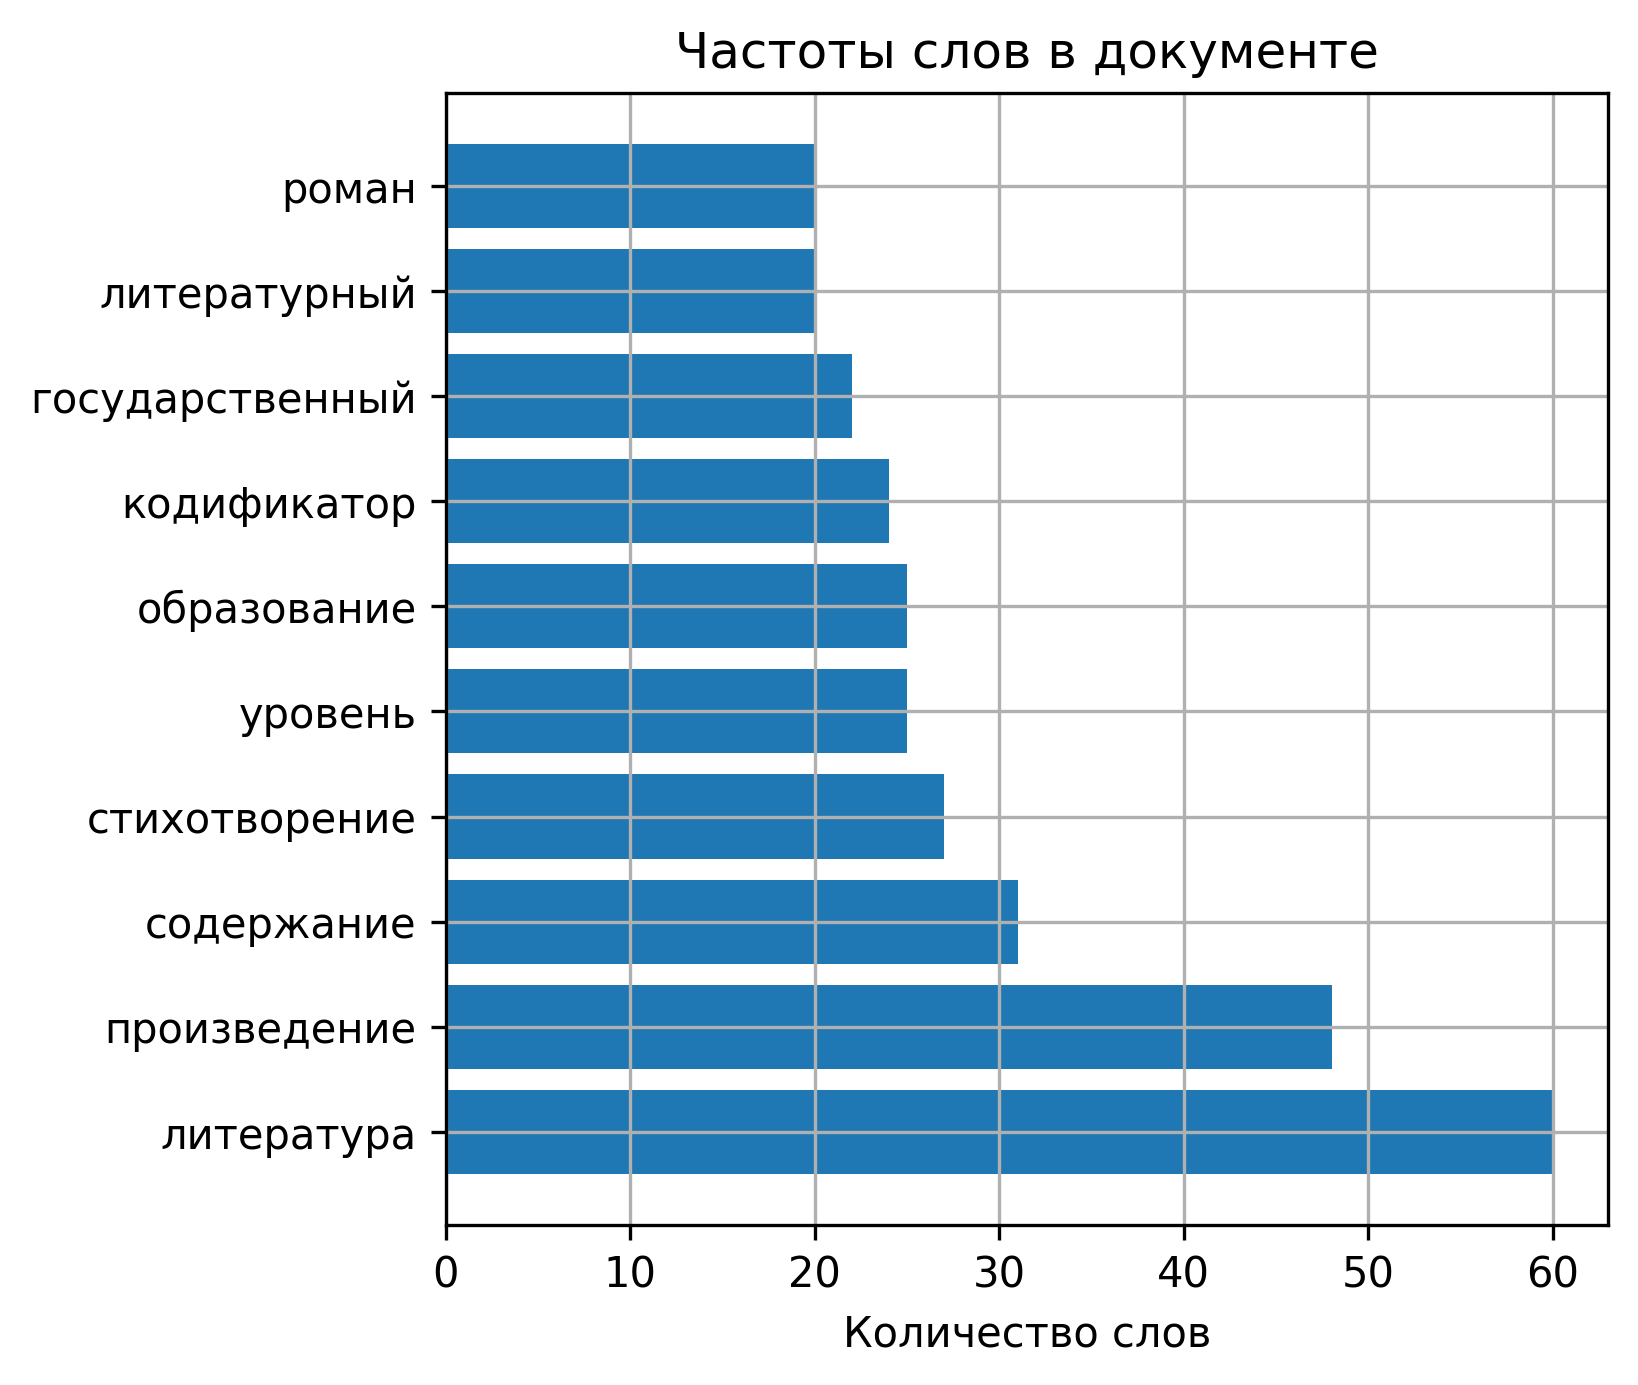

doc_for_TM/txt/2.txt


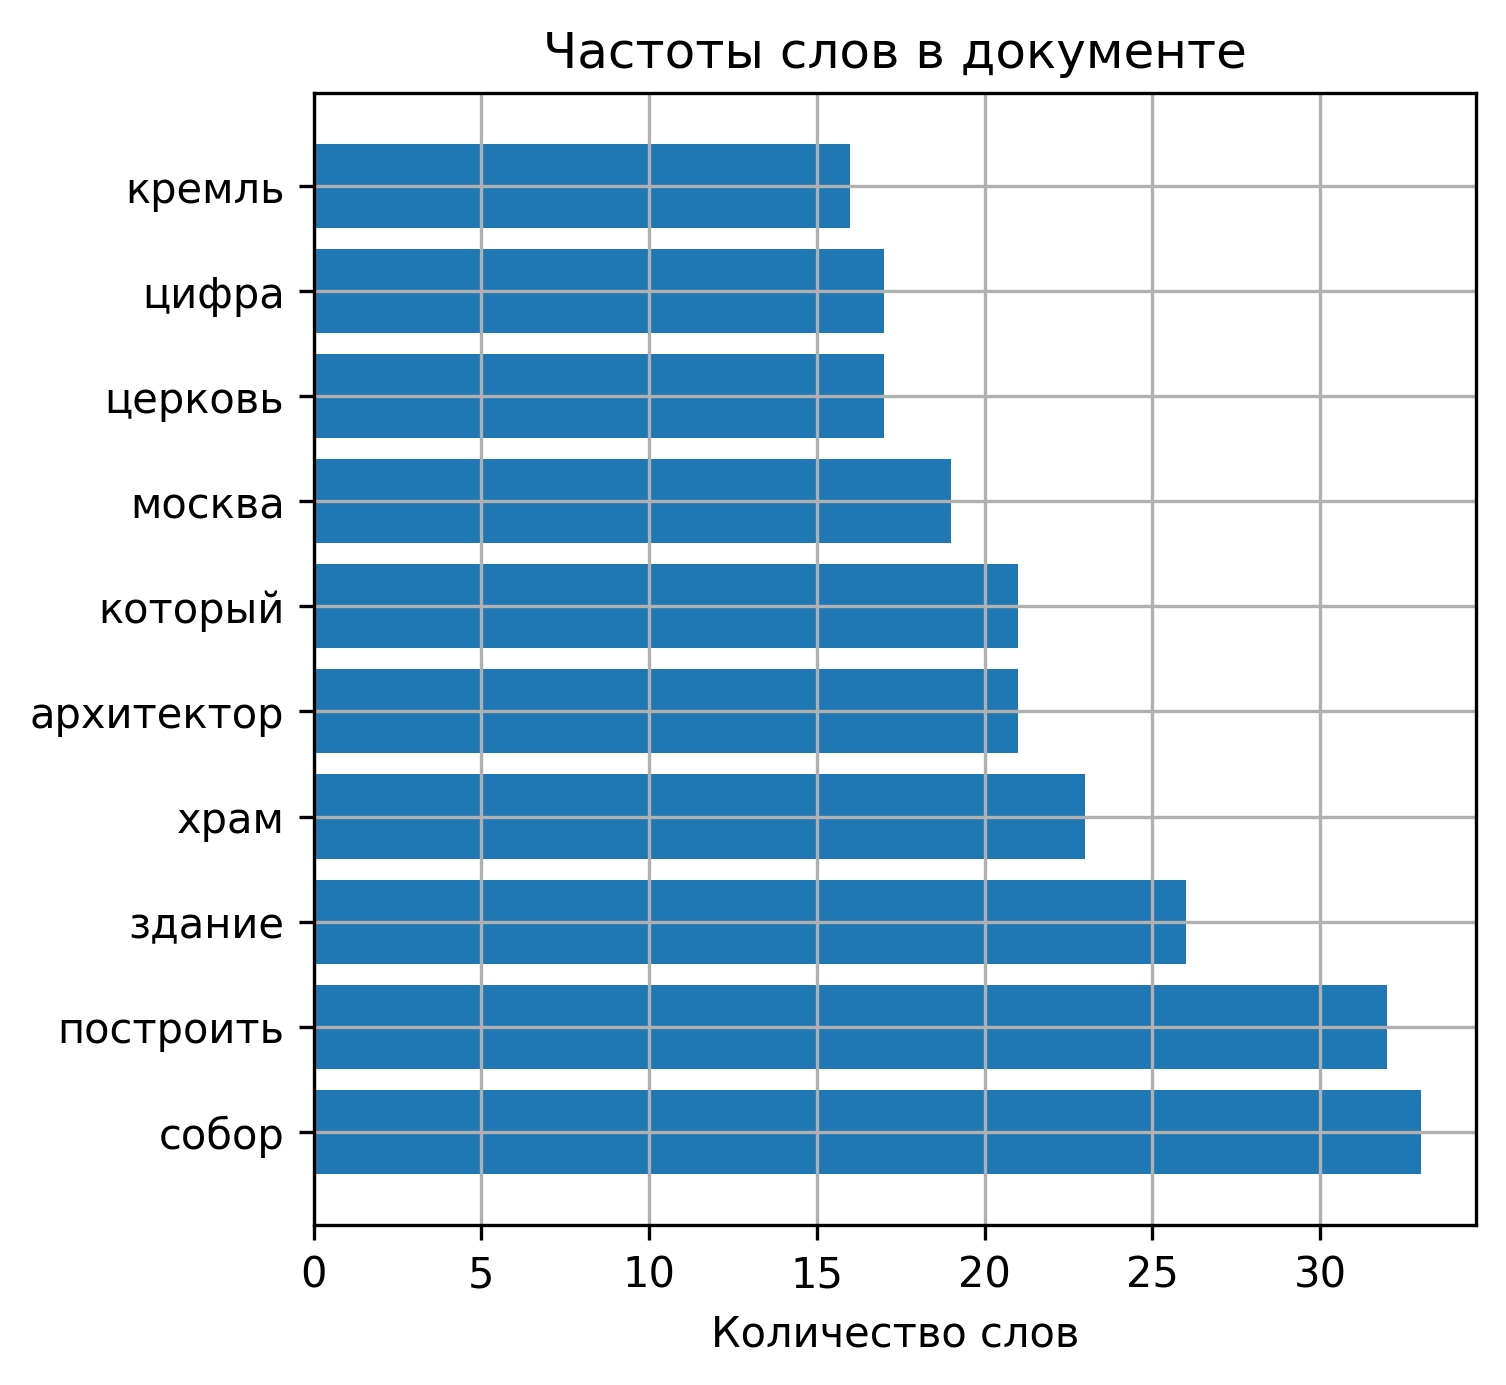

doc_for_TM/txt/3.txt


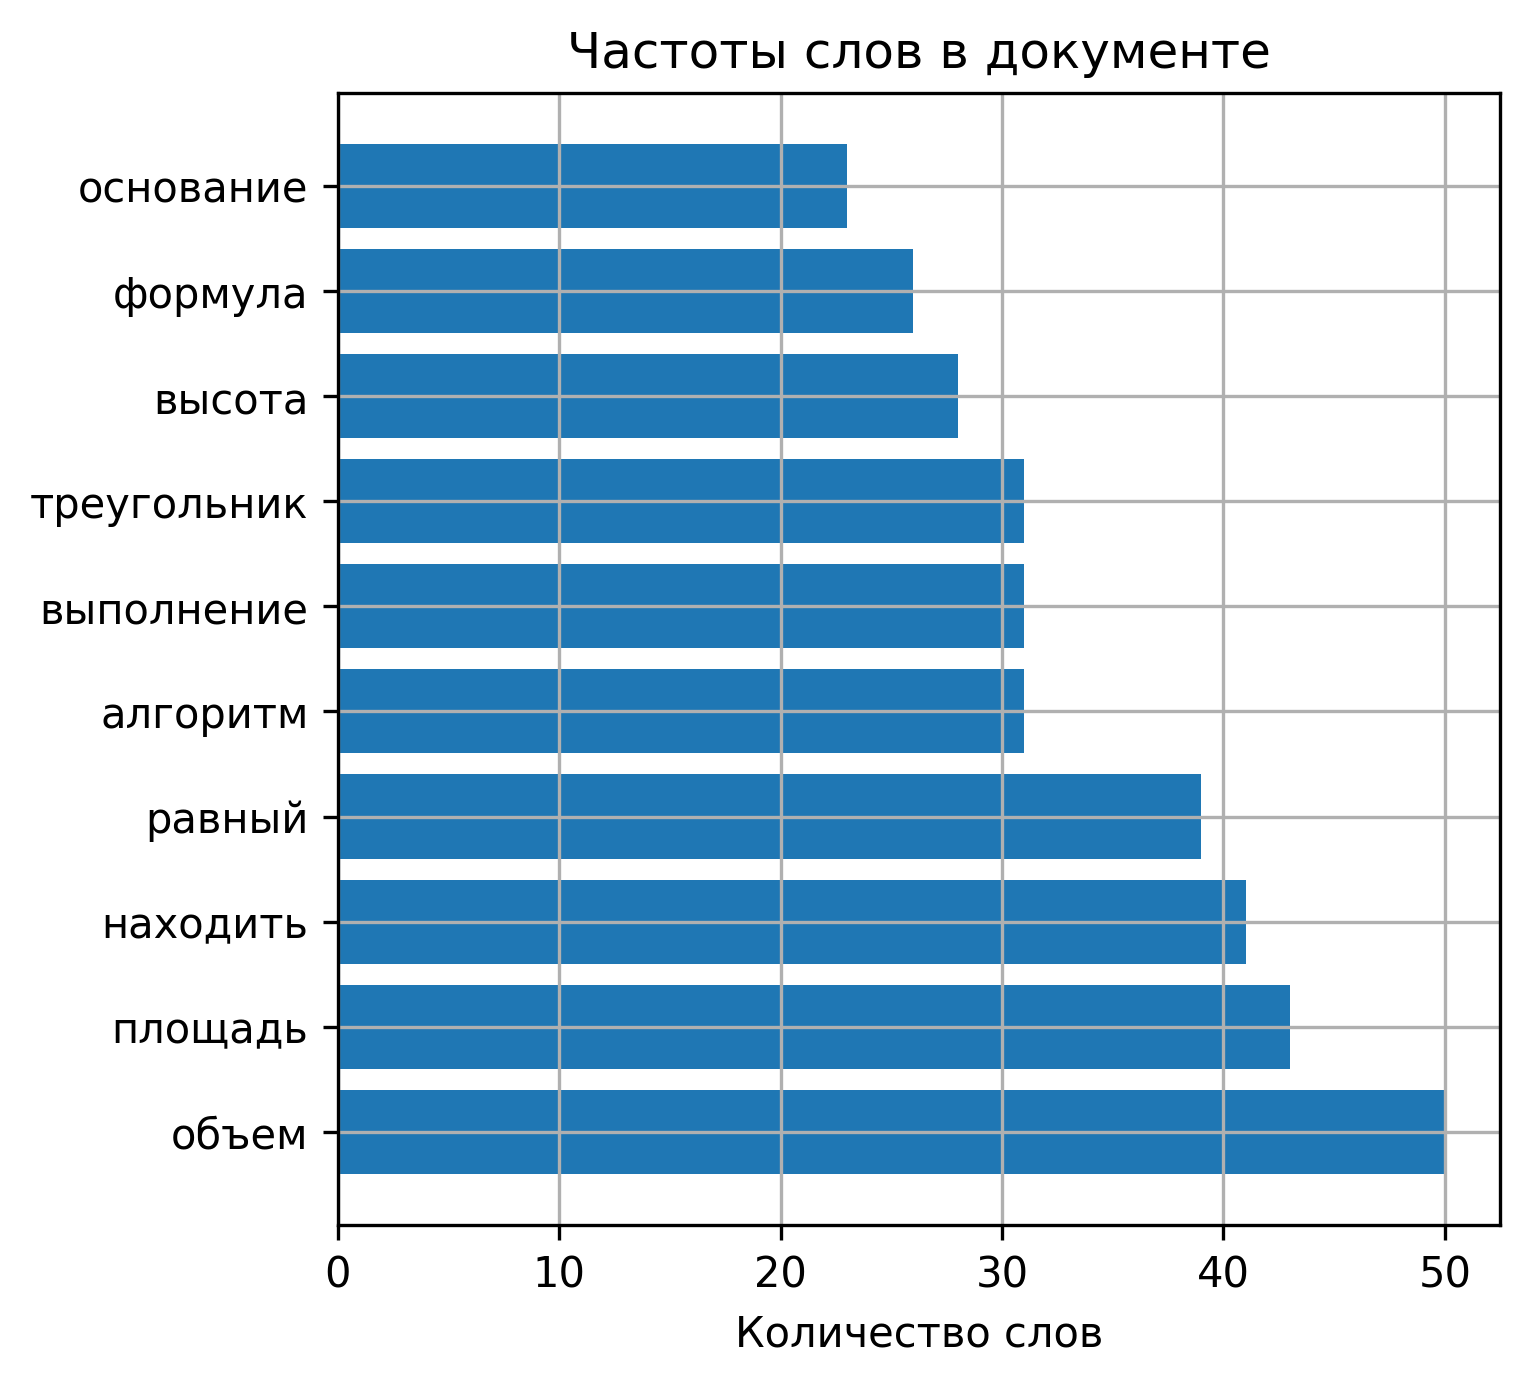

doc_for_TM/txt/4.txt


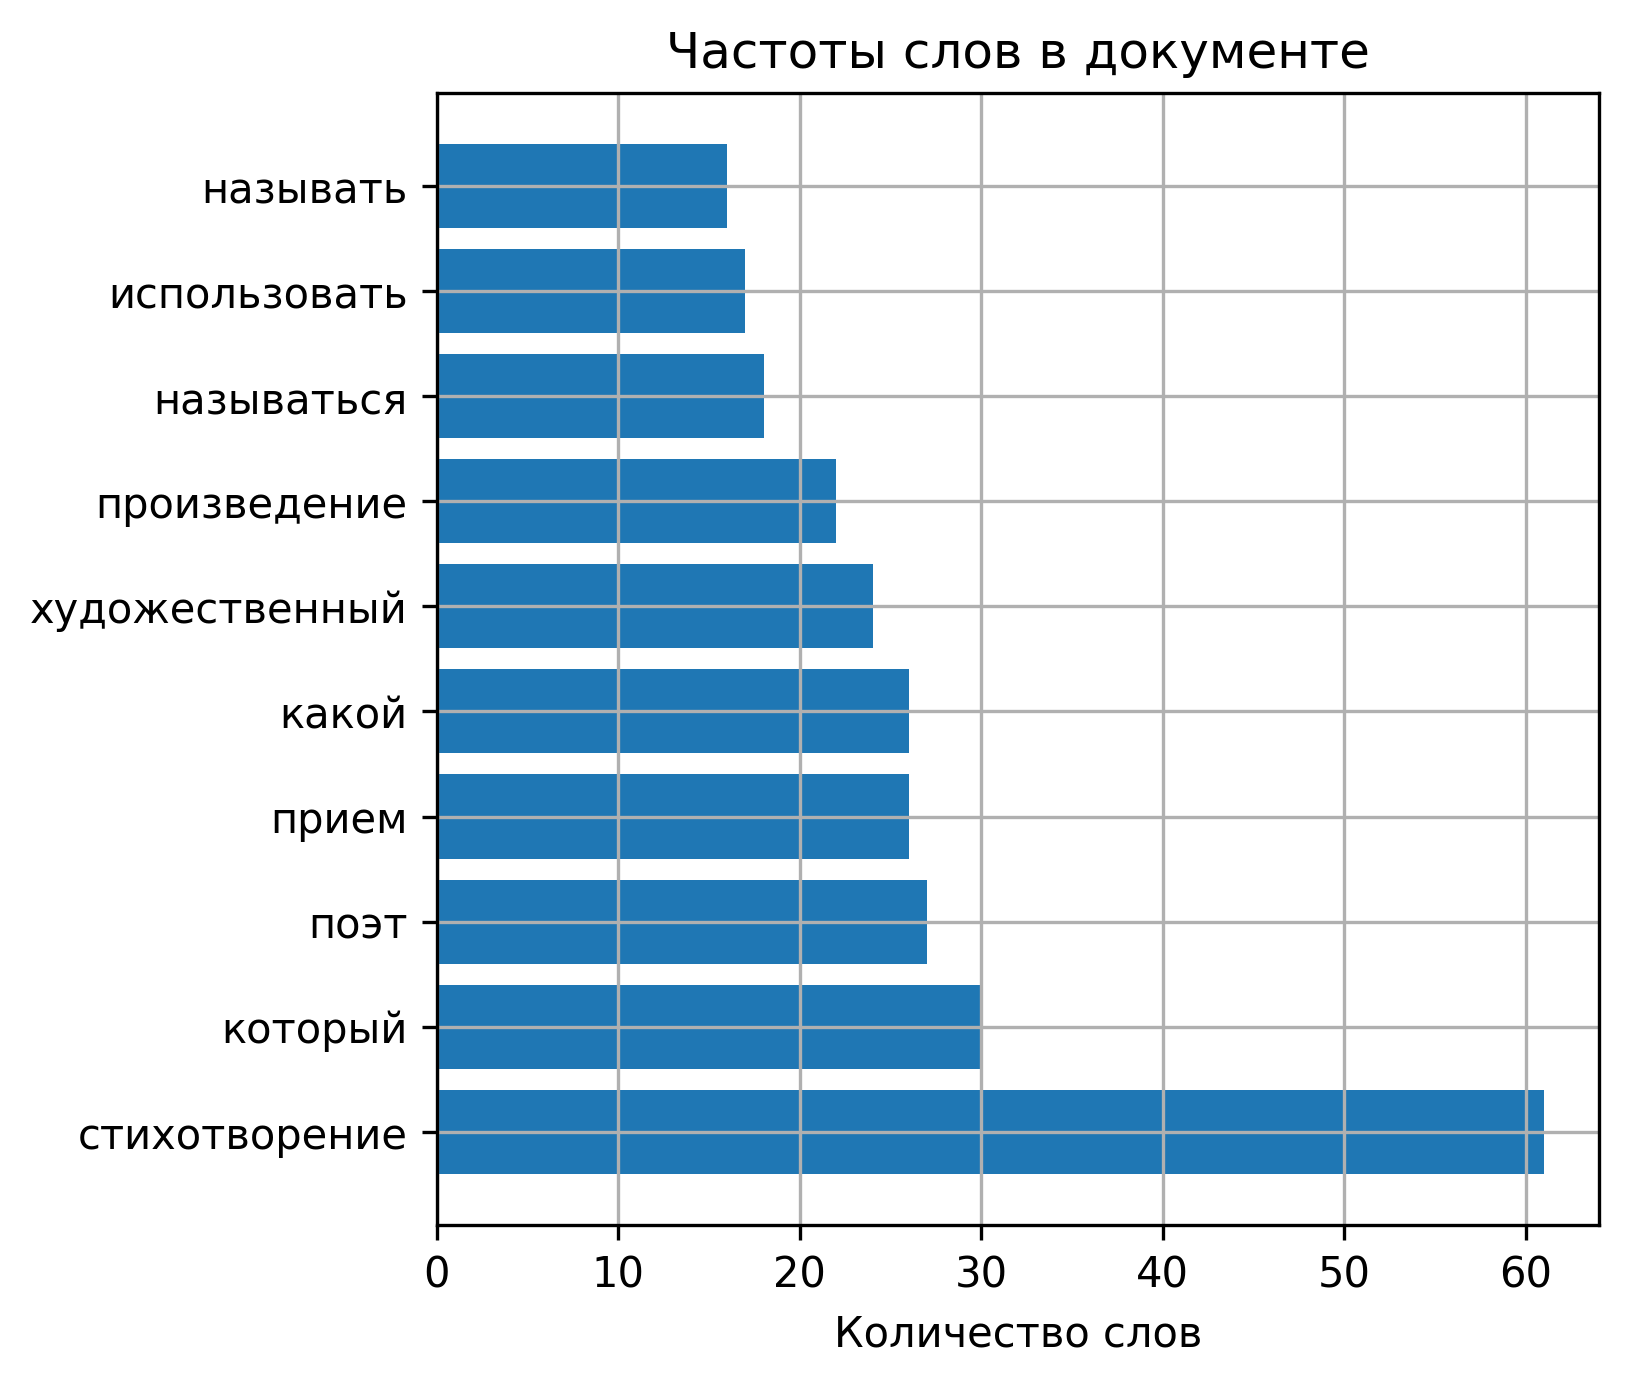

doc_for_TM/txt/5.txt


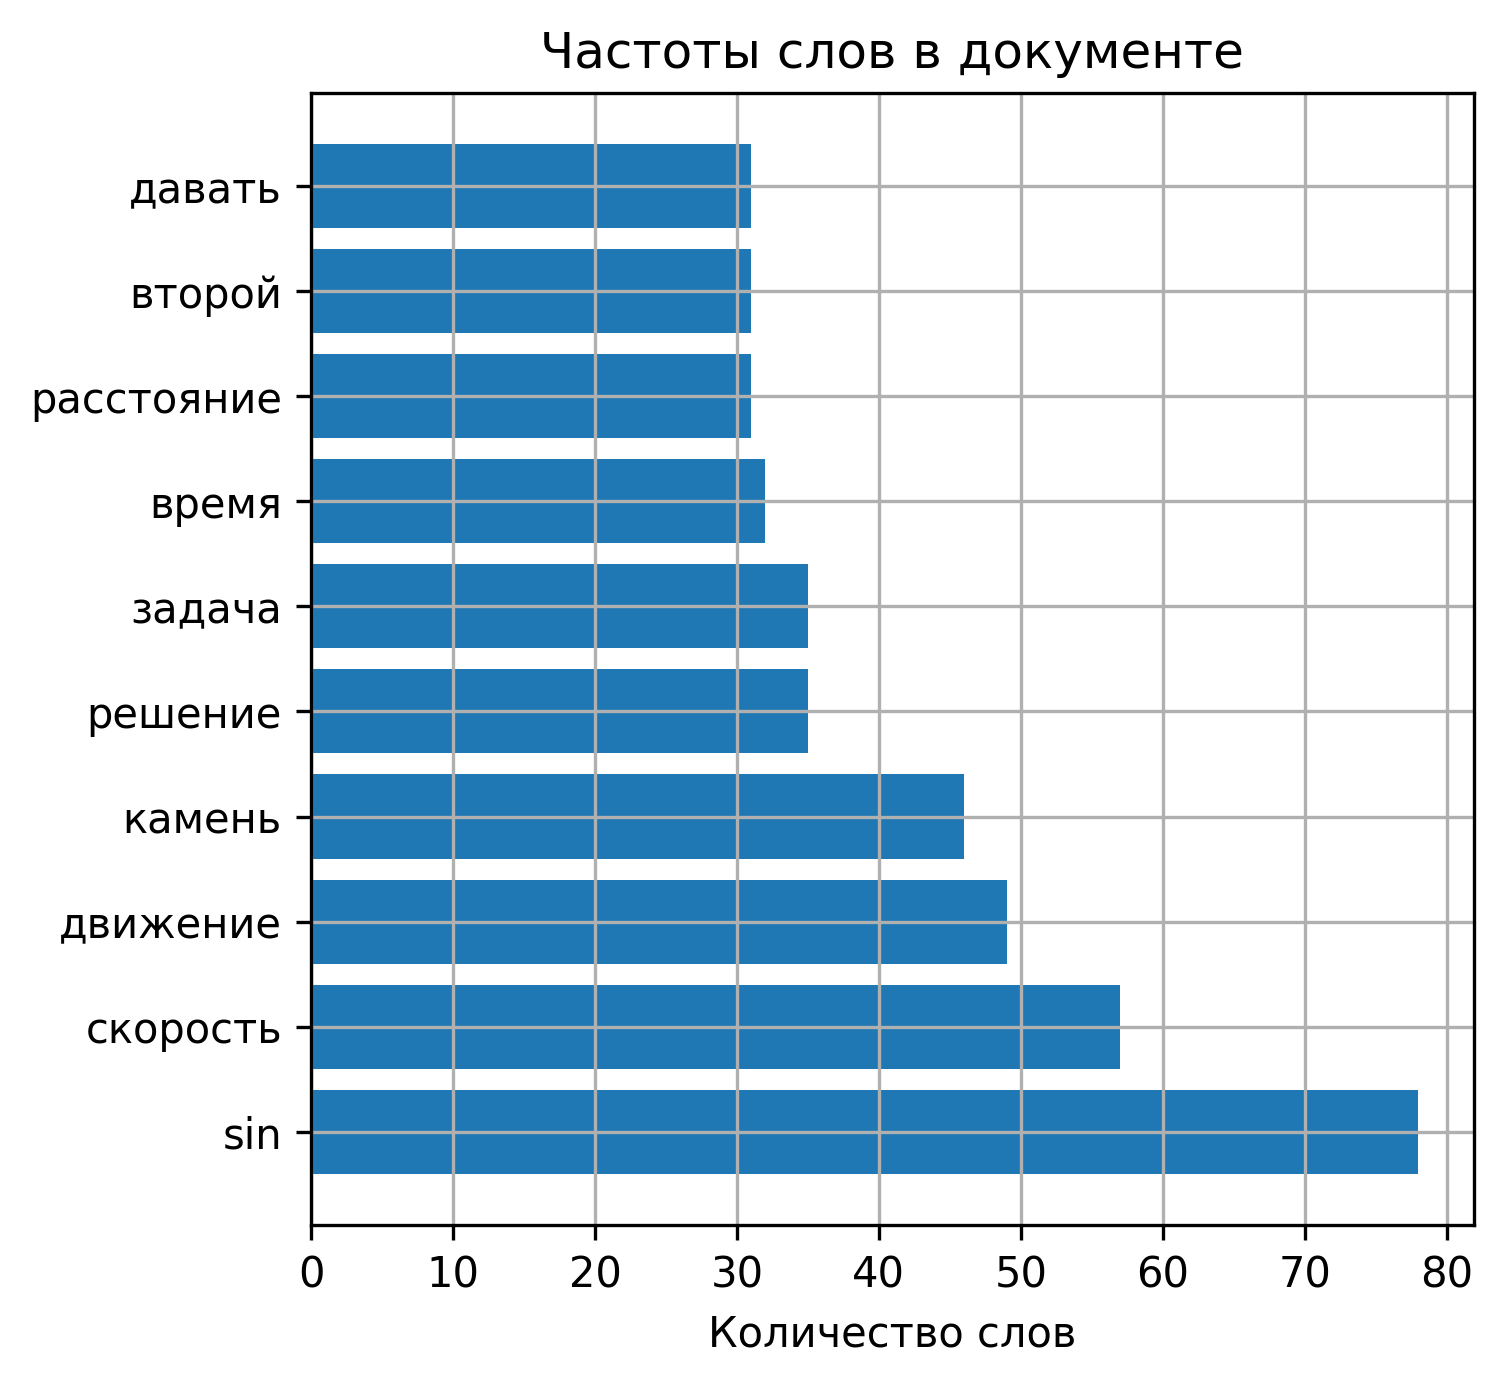

doc_for_TM/txt/6.txt


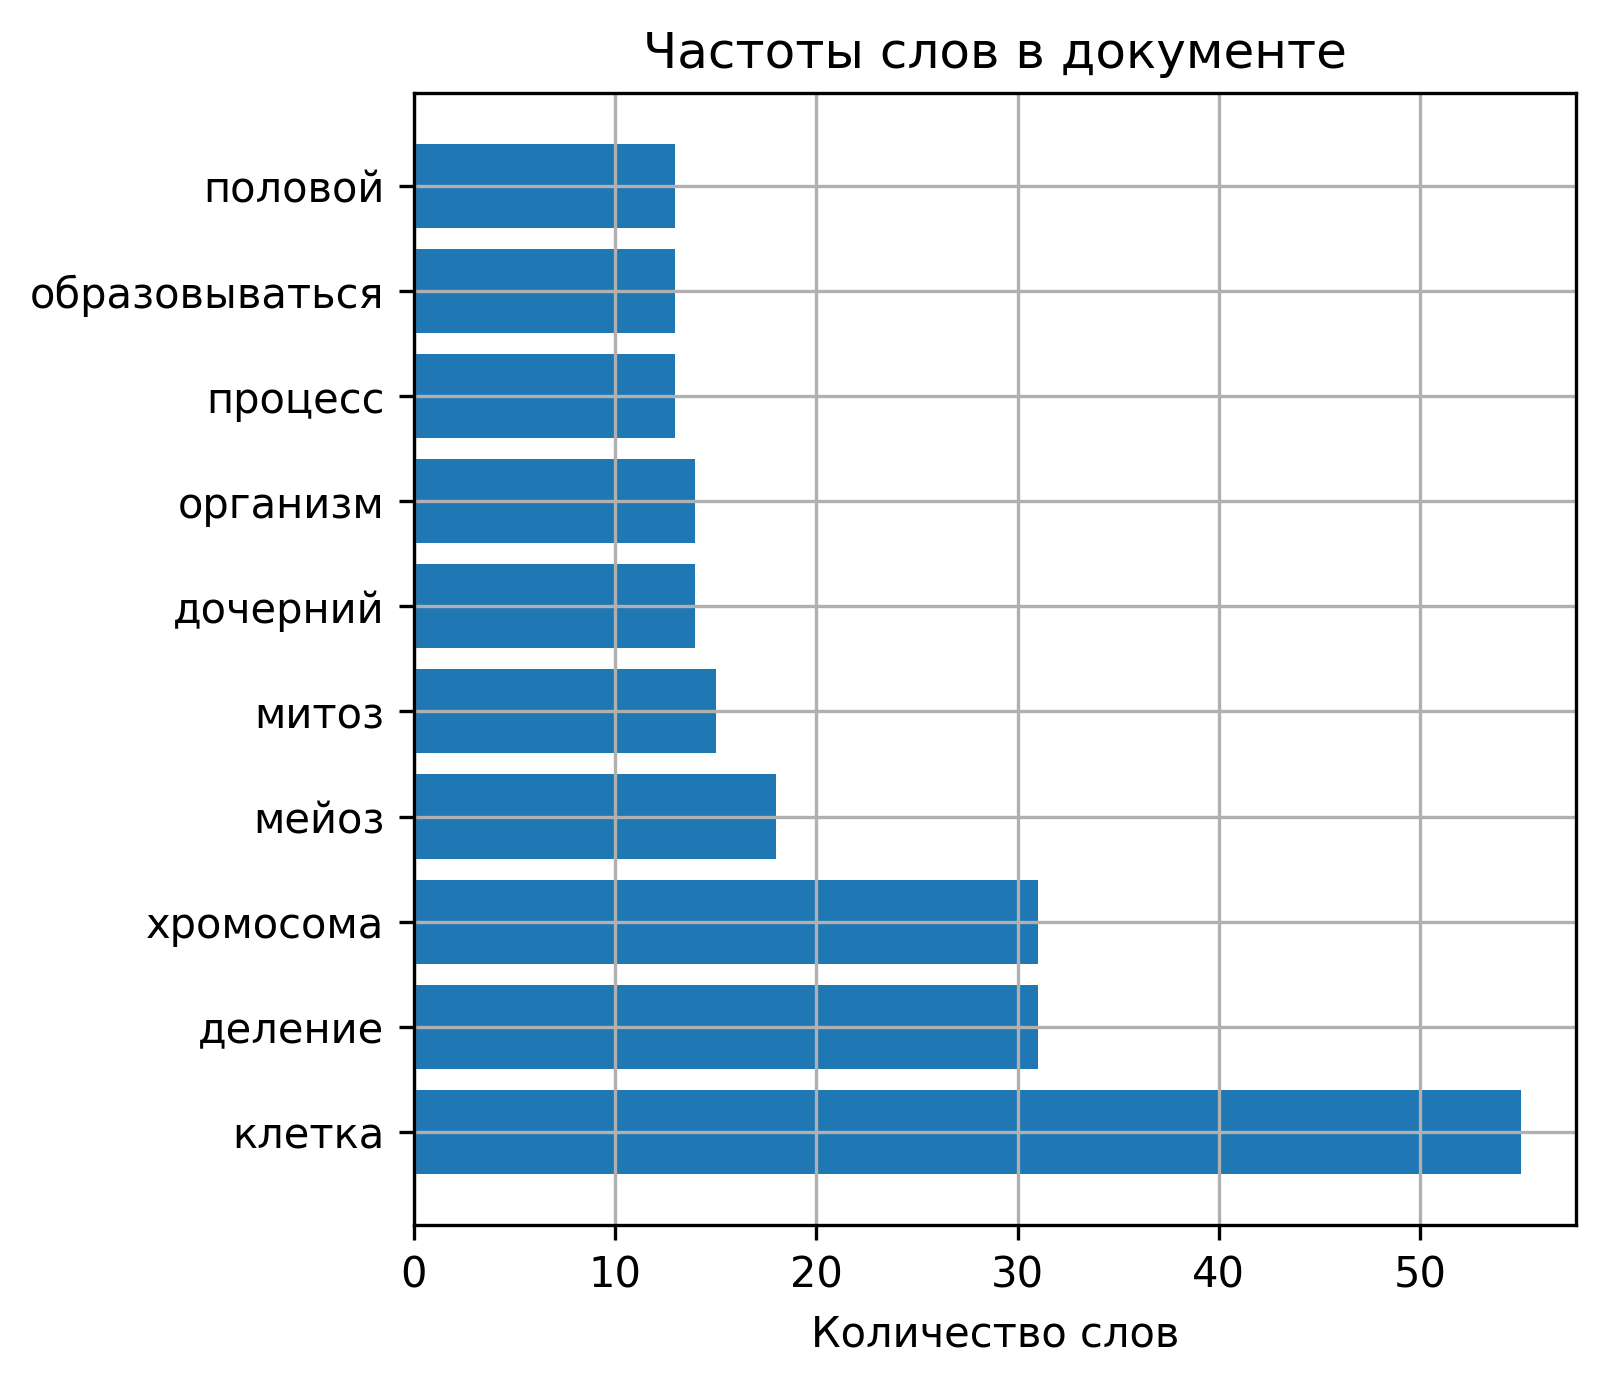

doc_for_TM/txt/7.txt


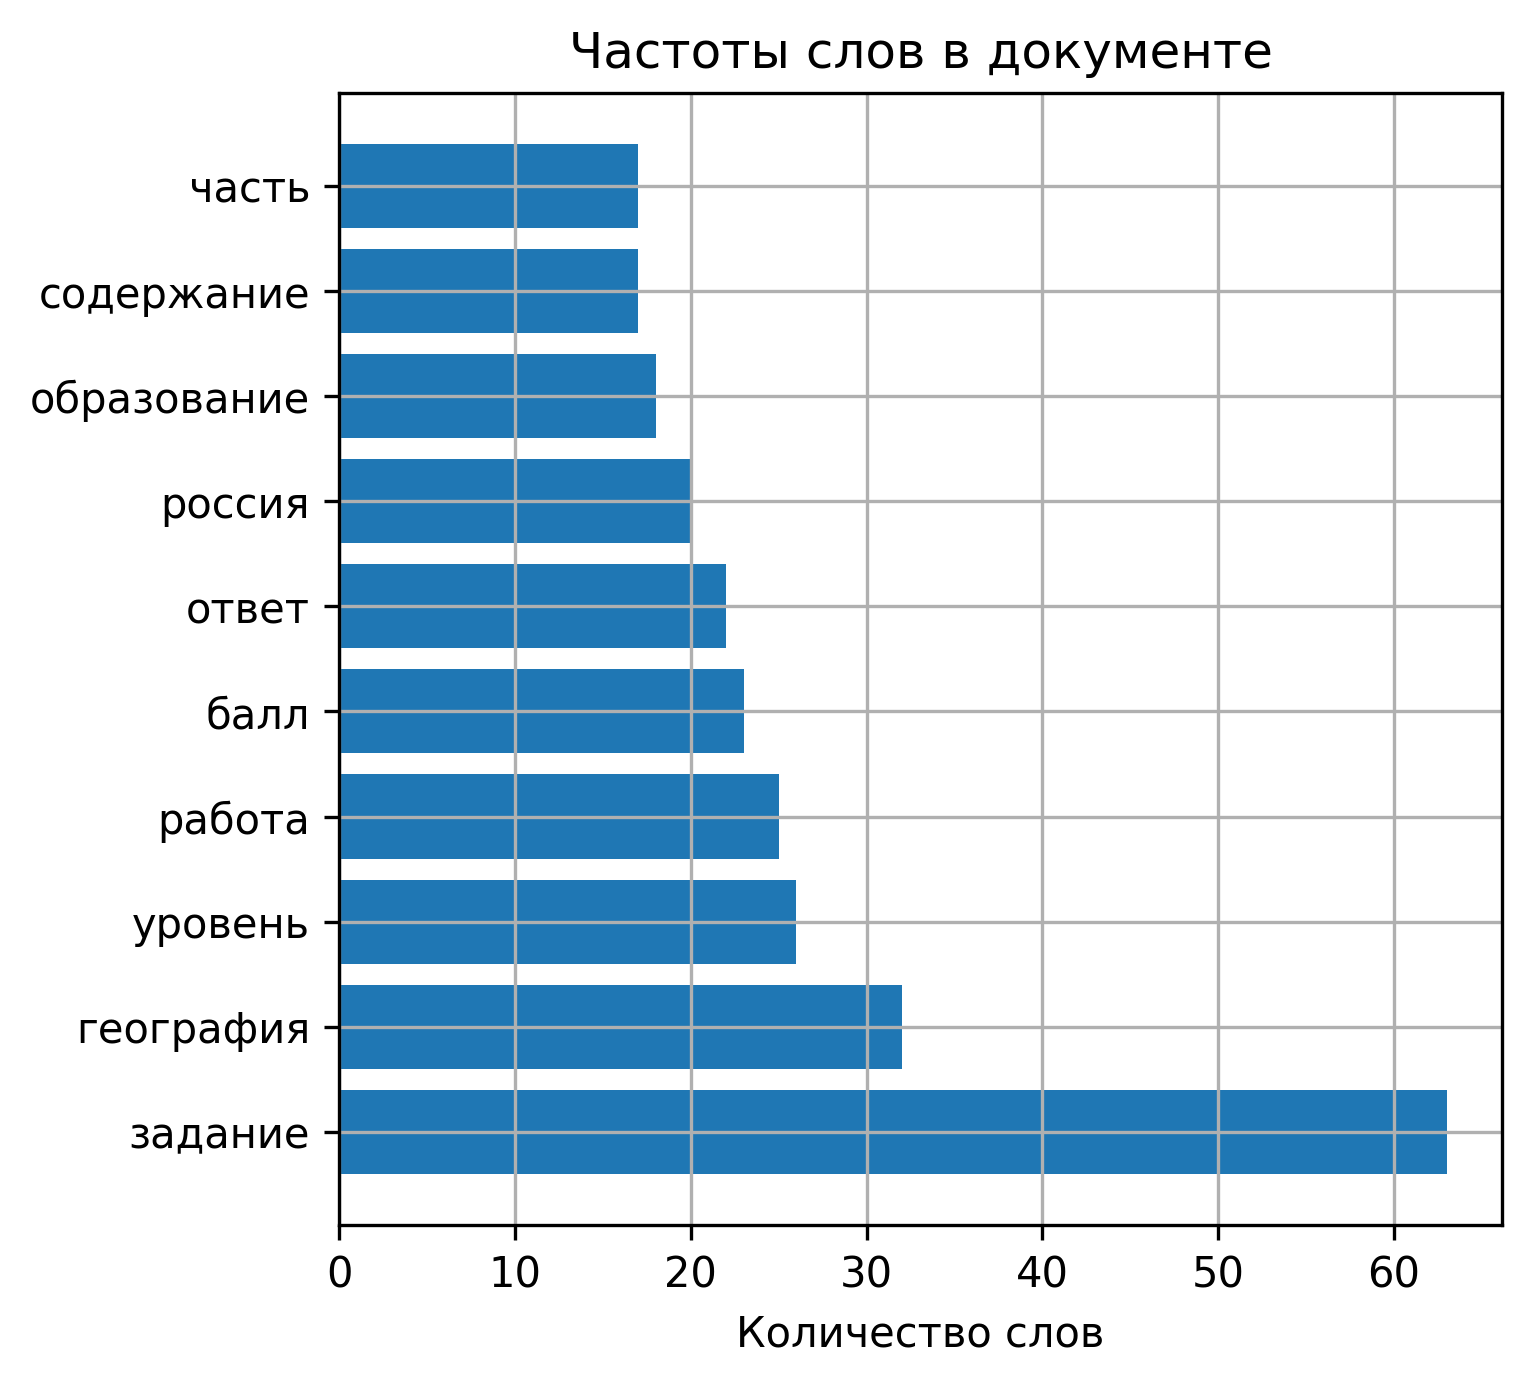

doc_for_TM/txt/8.txt


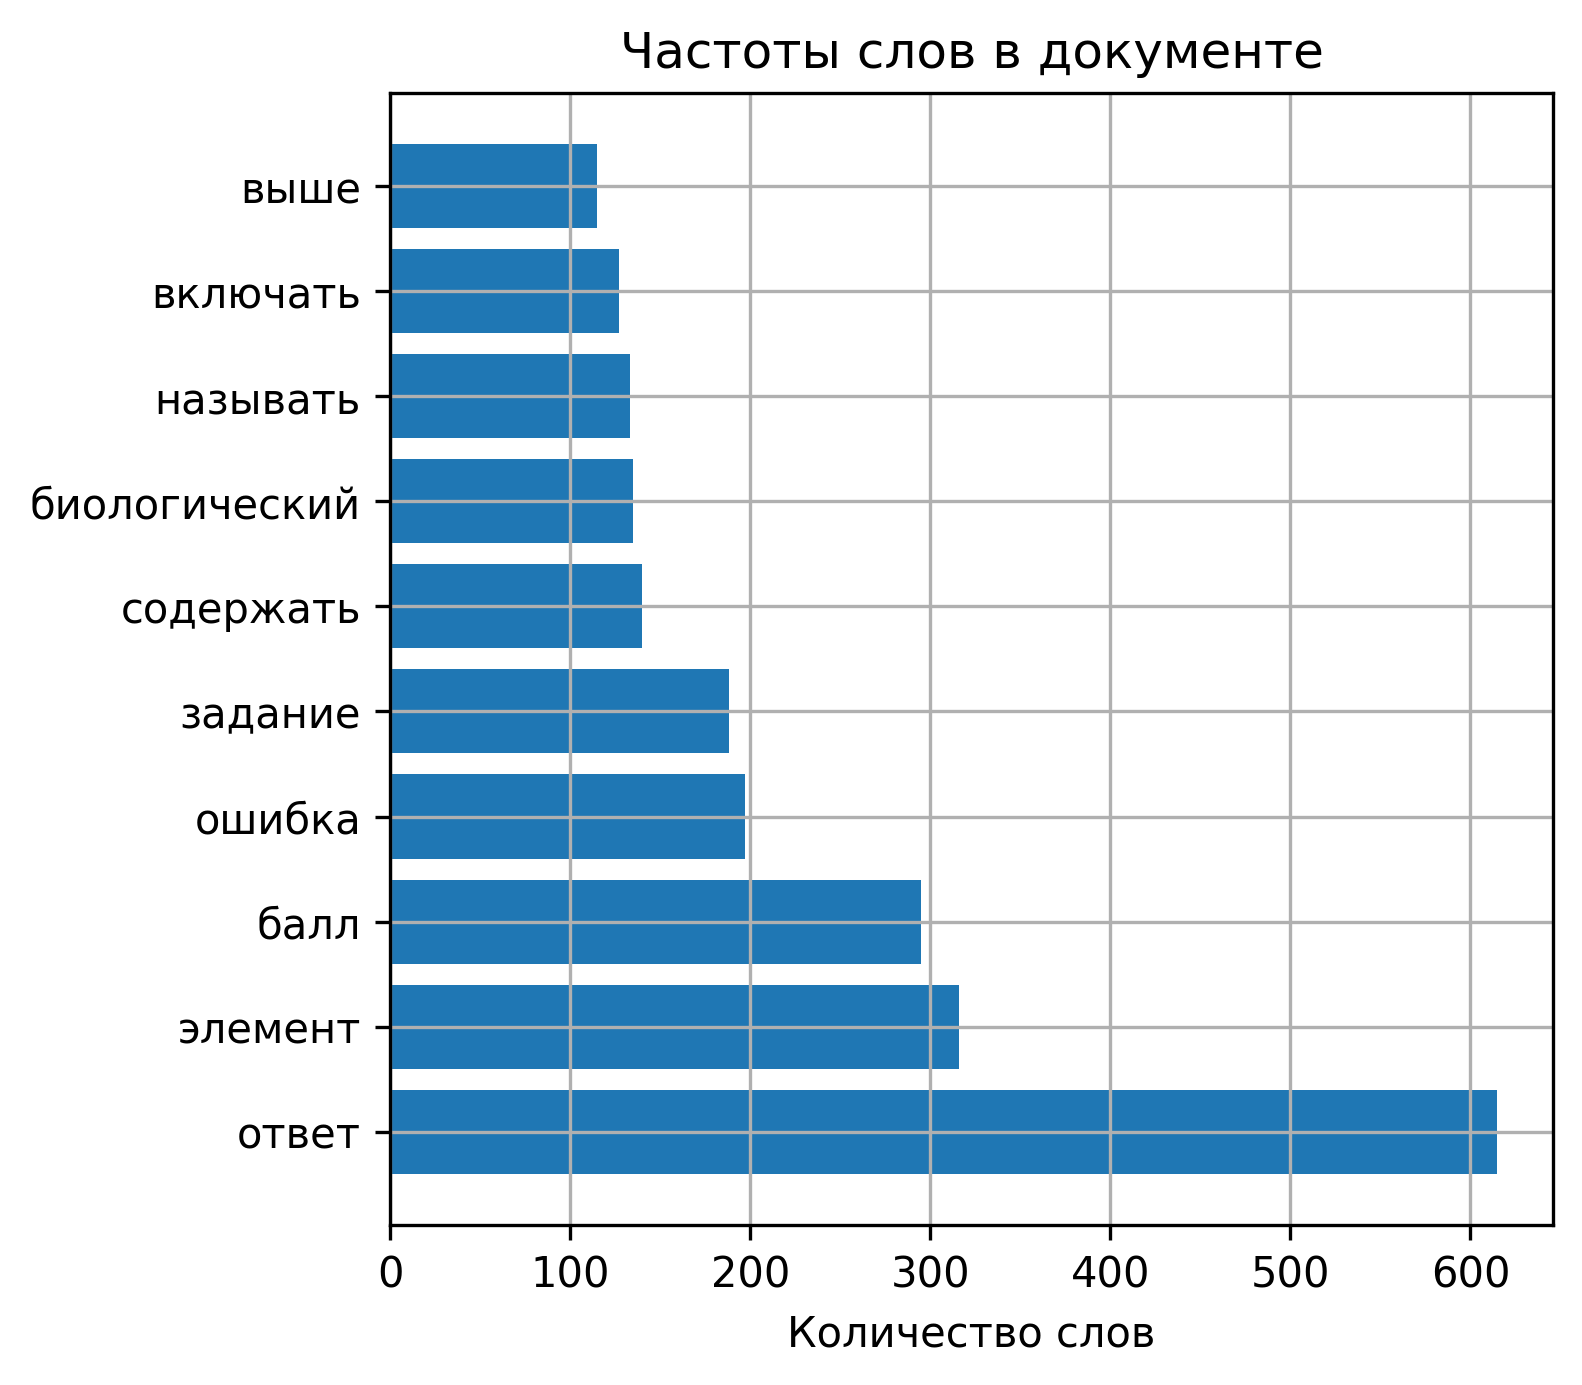

doc_for_TM/txt/9.txt


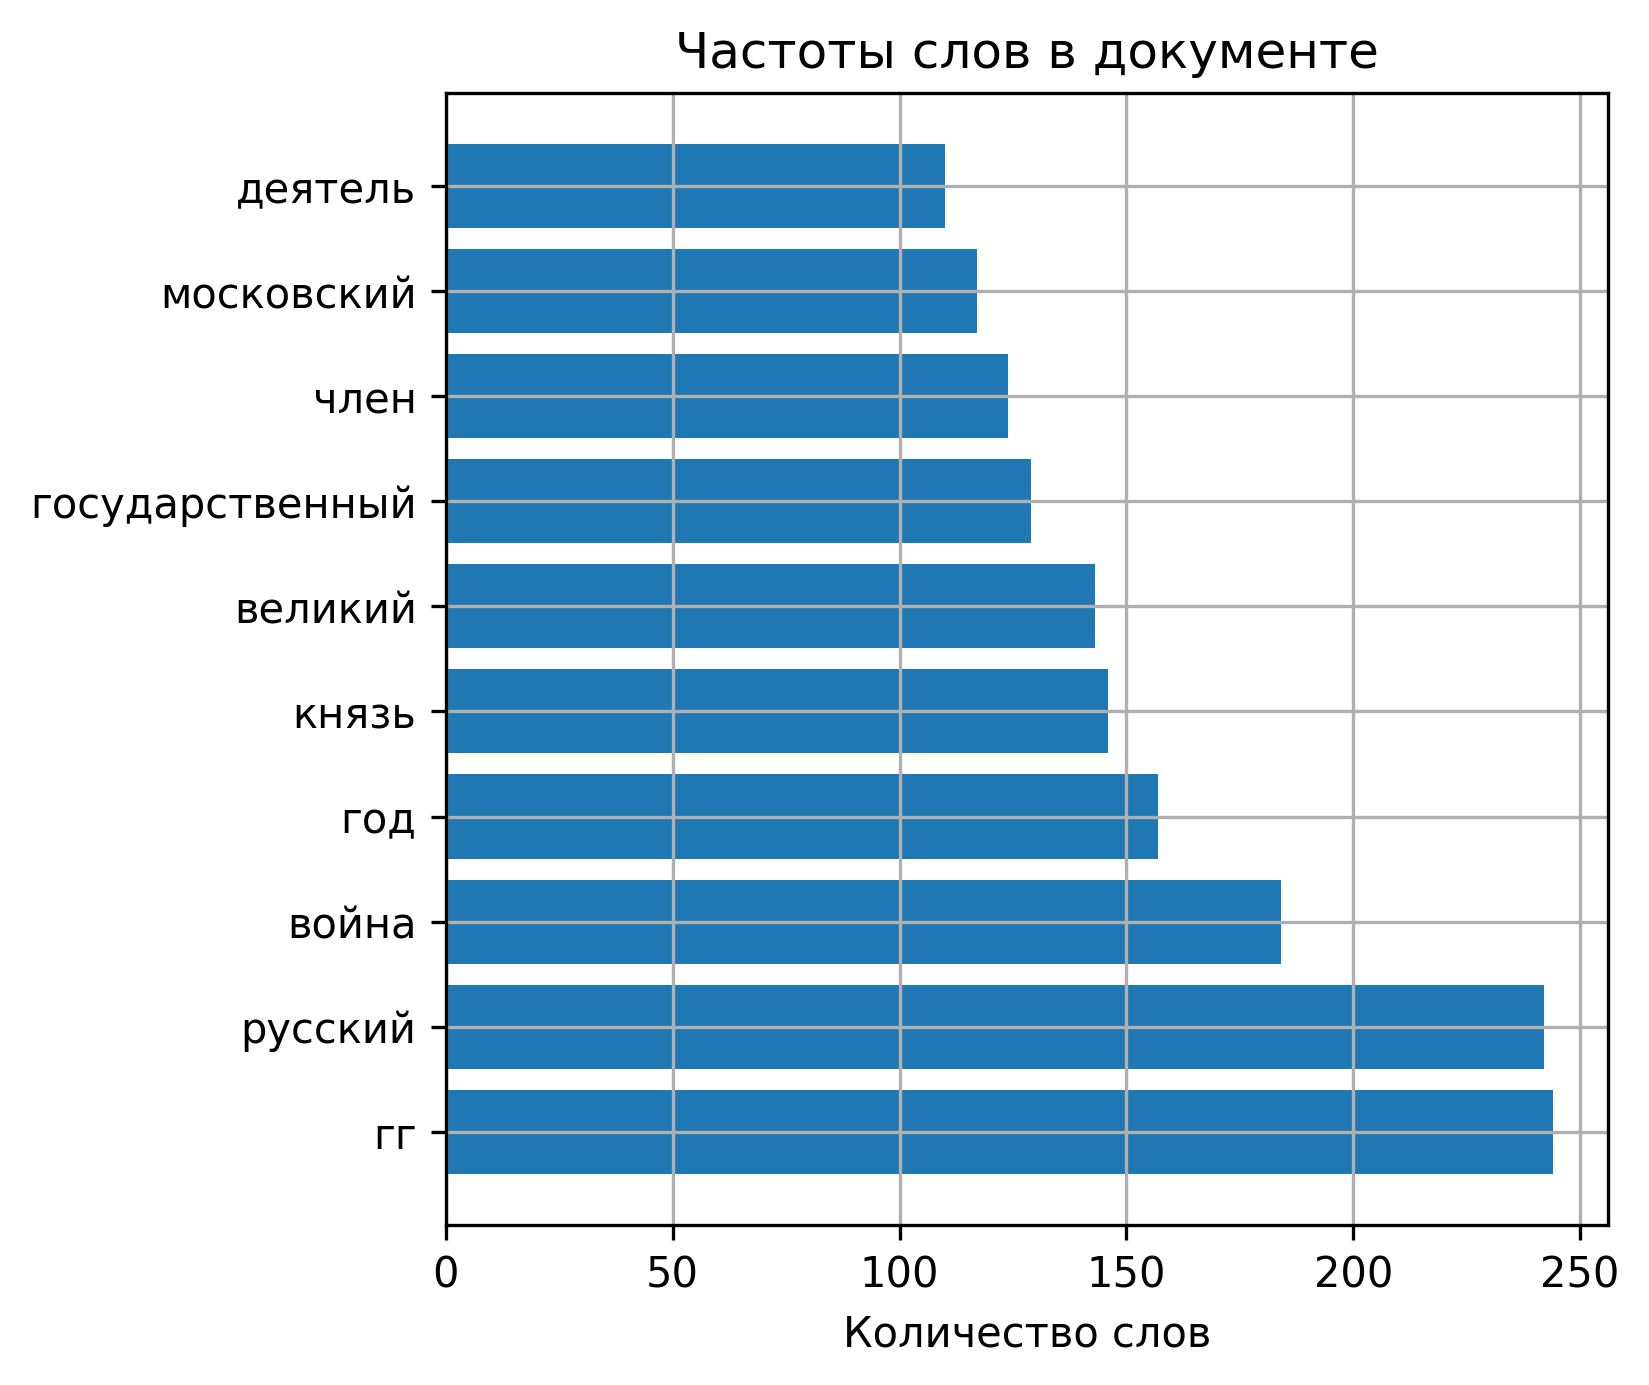

doc_for_TM/txt/10.txt


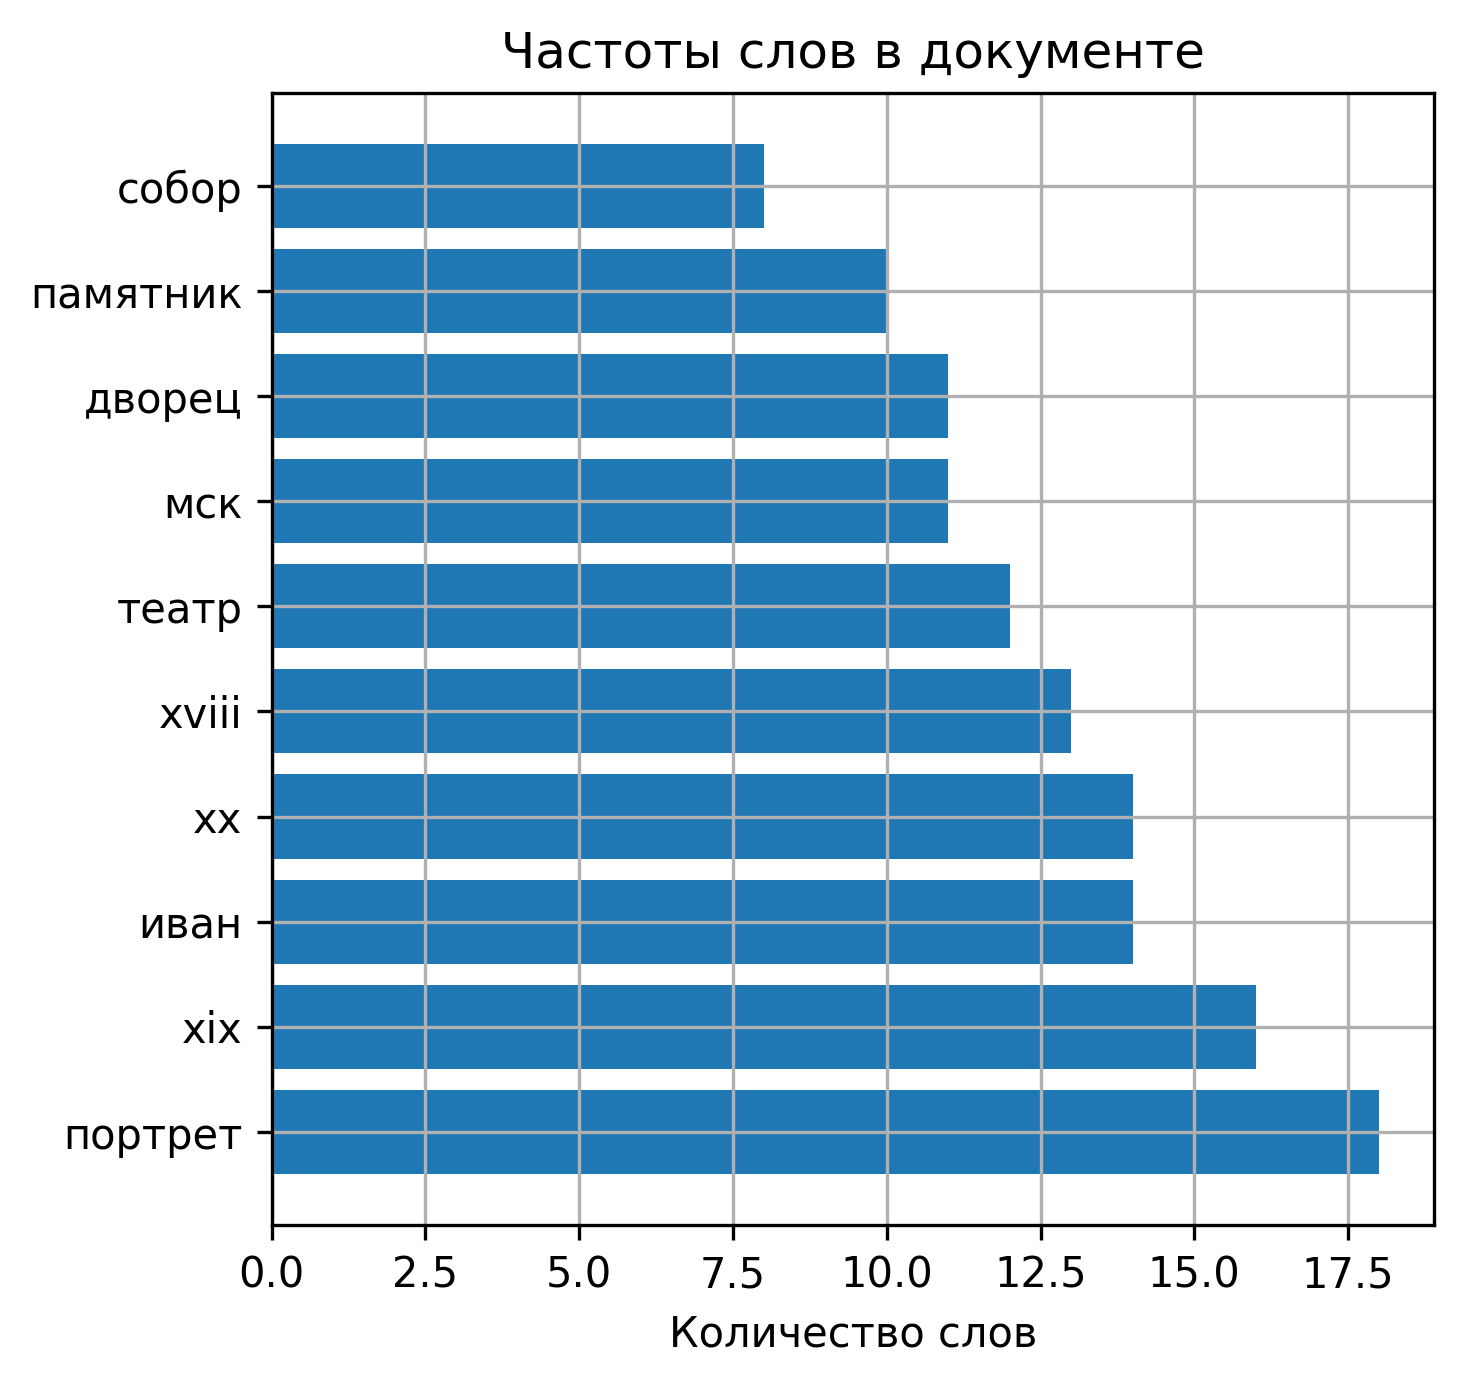

doc_for_TM/txt/11.txt


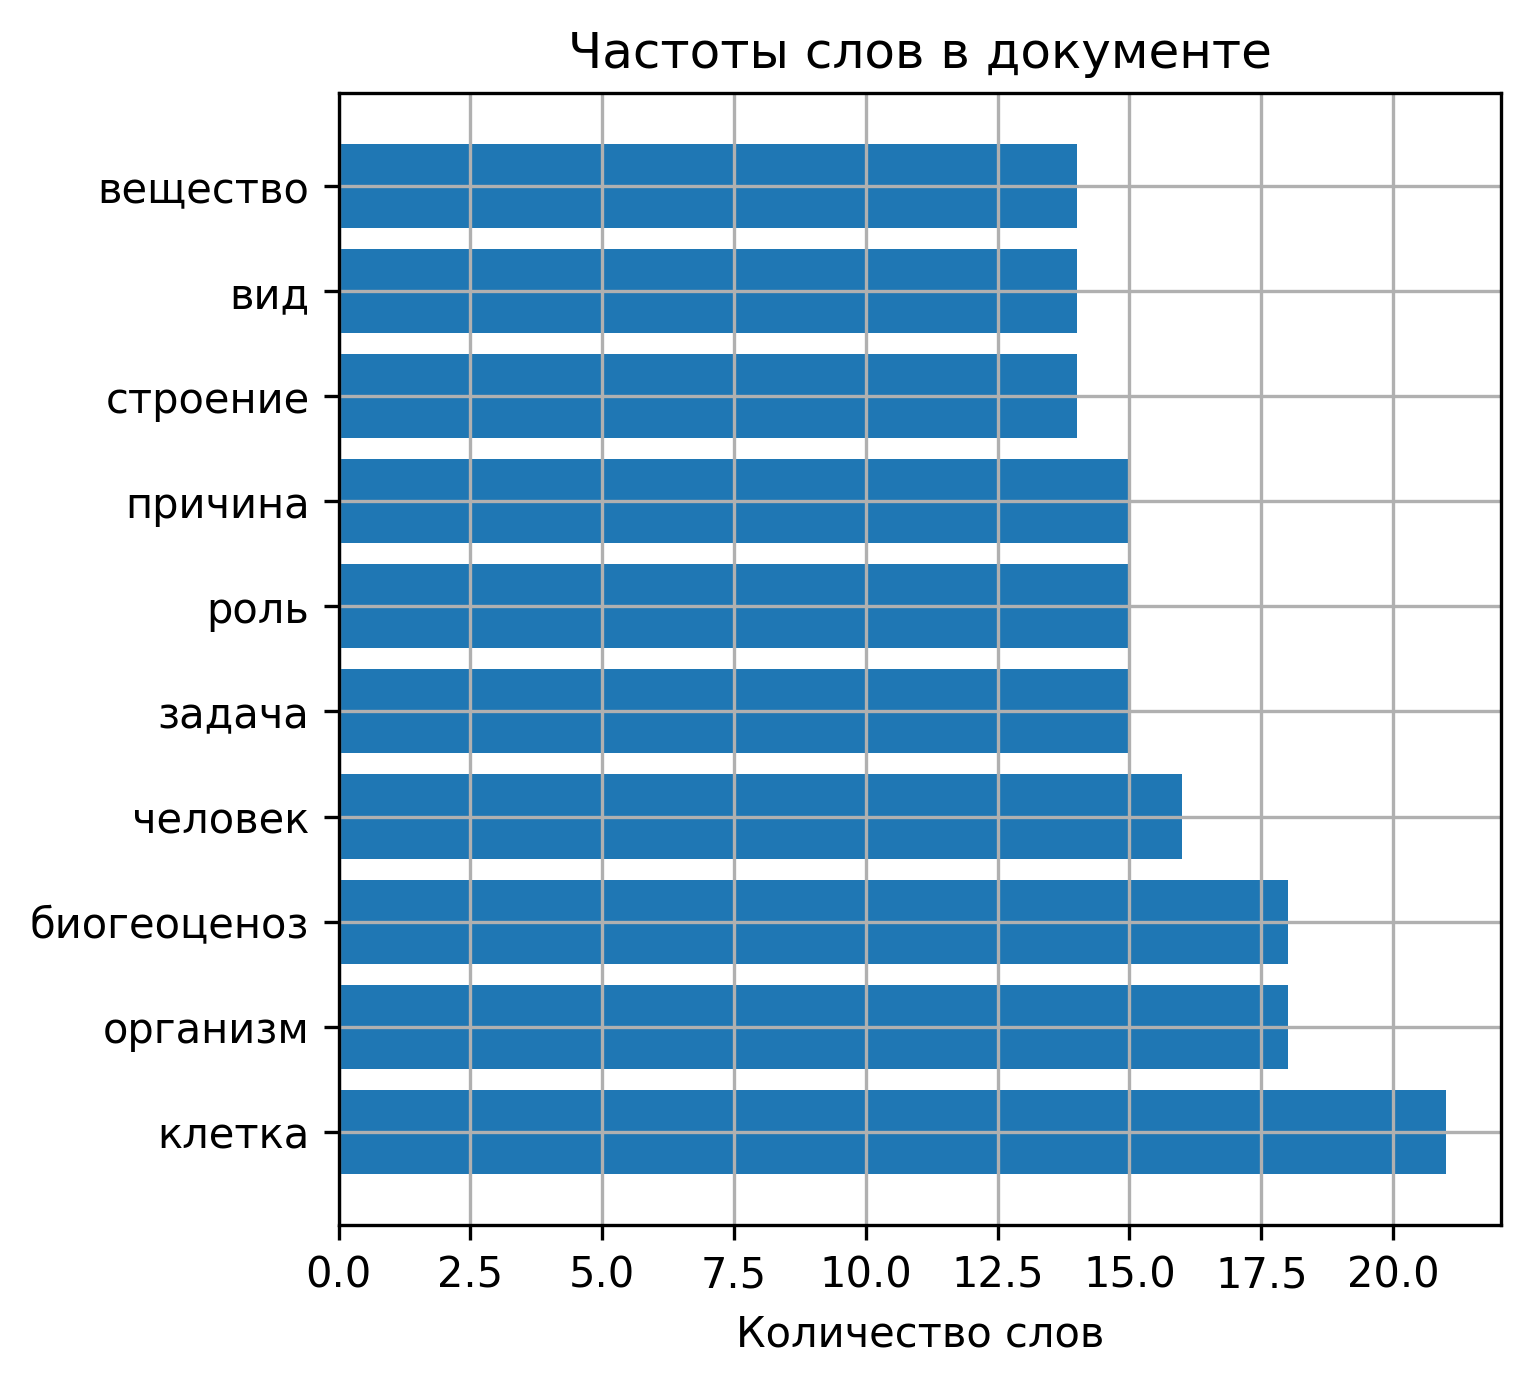

doc_for_TM/txt/12.txt


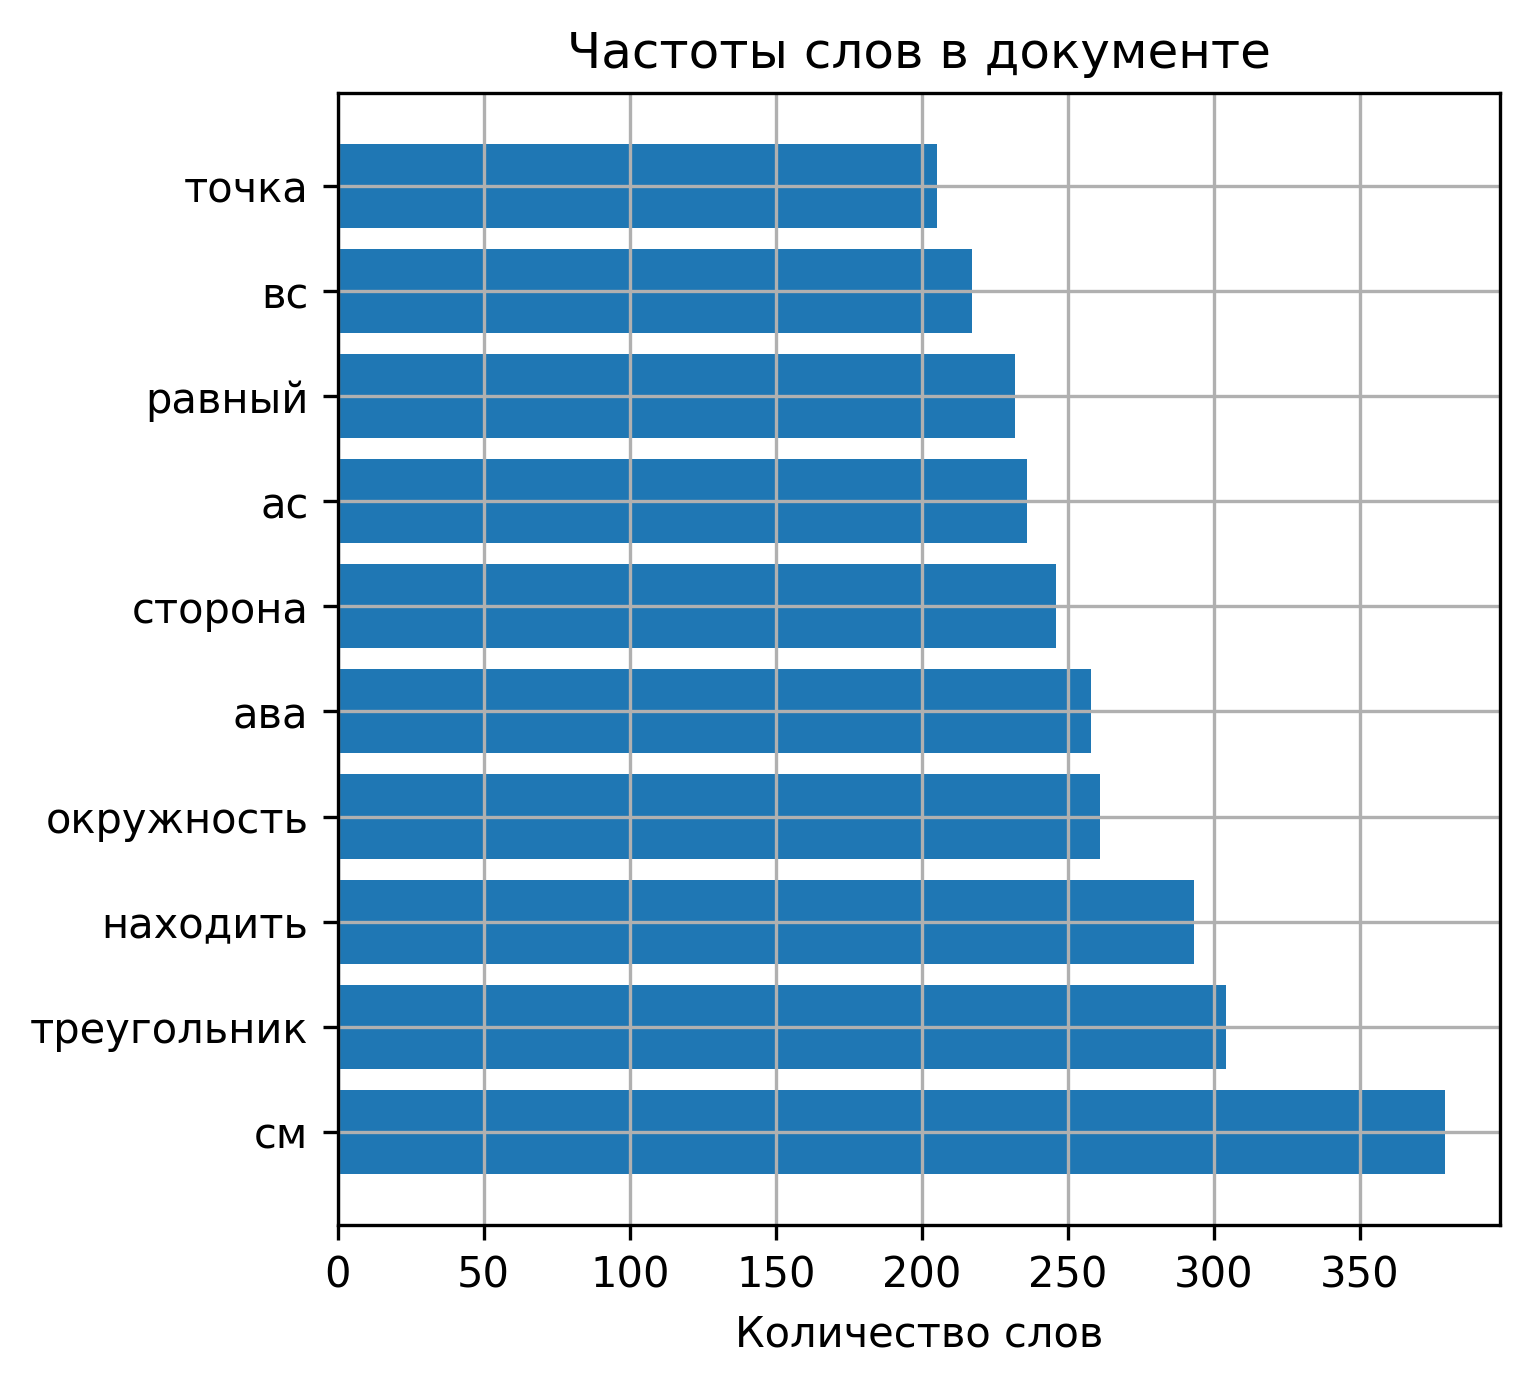

doc_for_TM/txt/13.txt


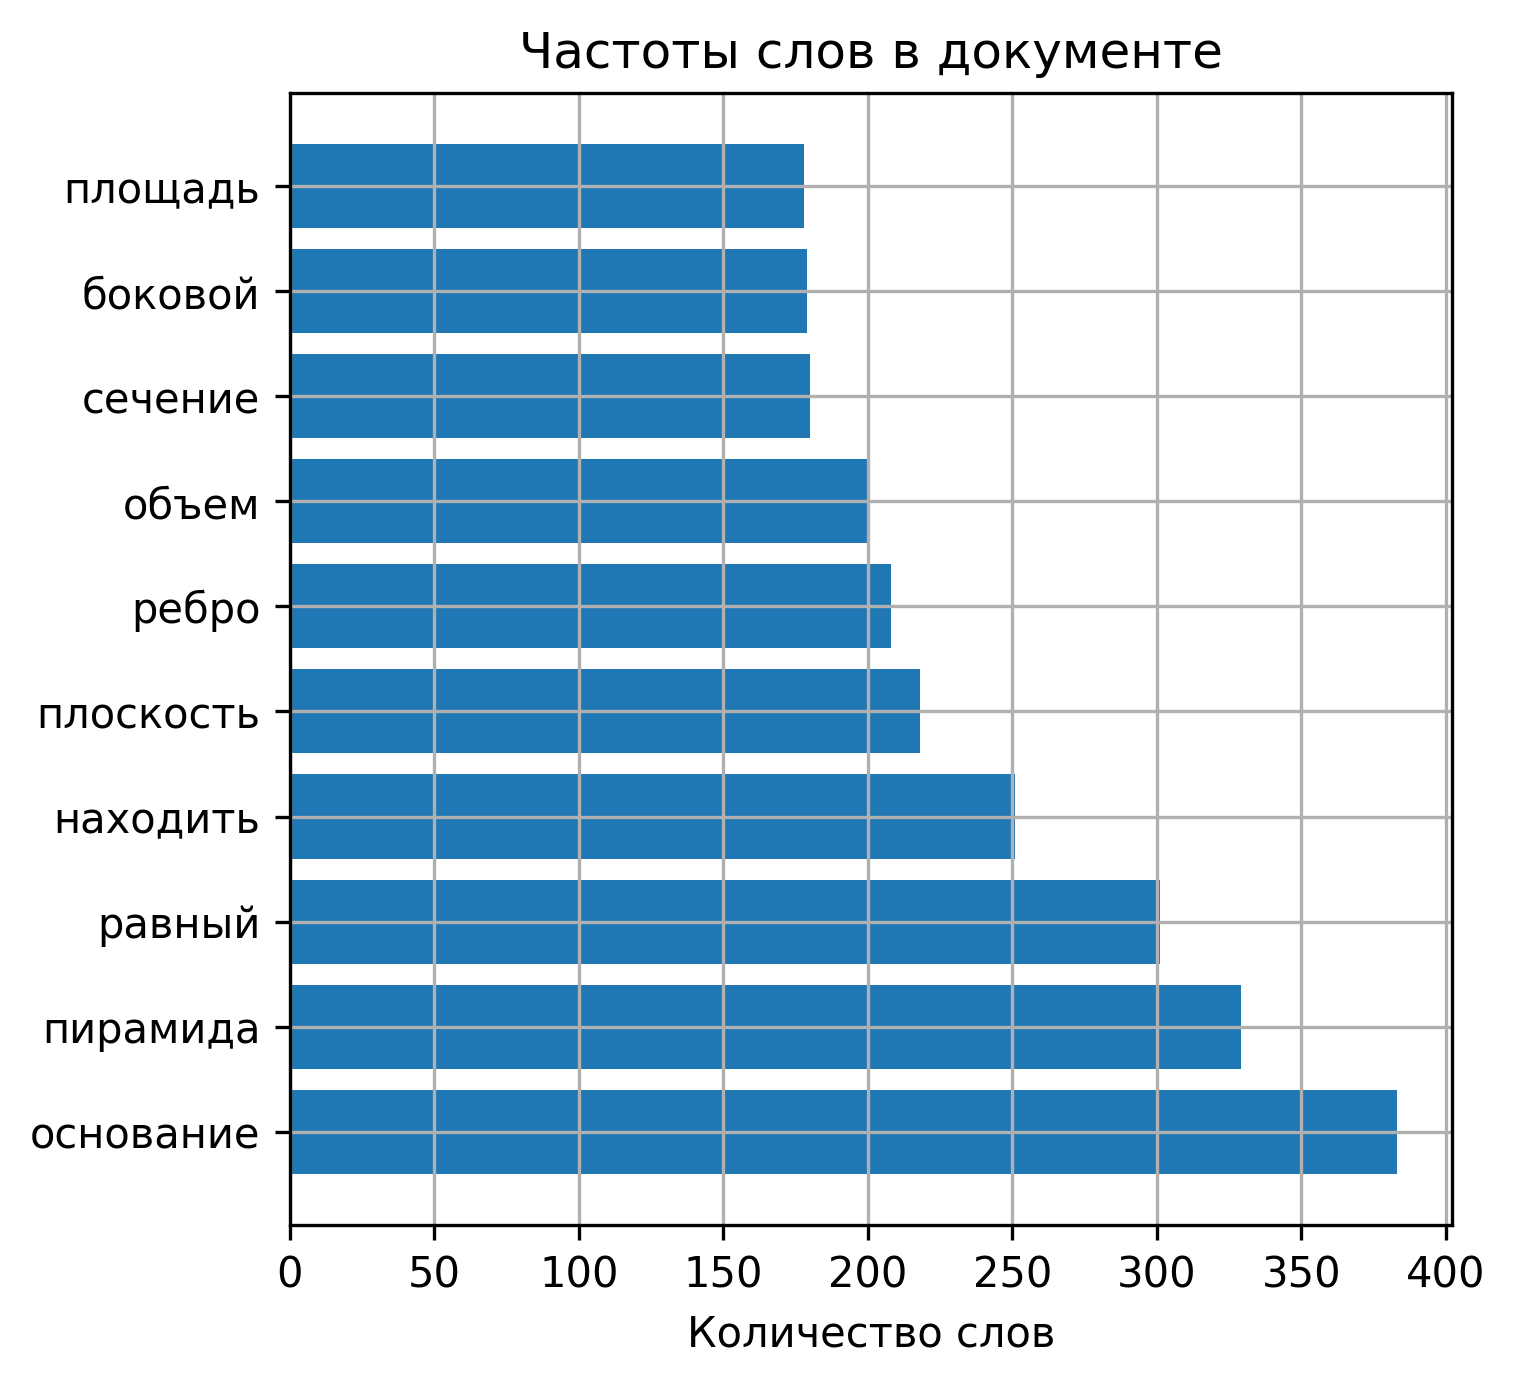

doc_for_TM/txt/14.txt


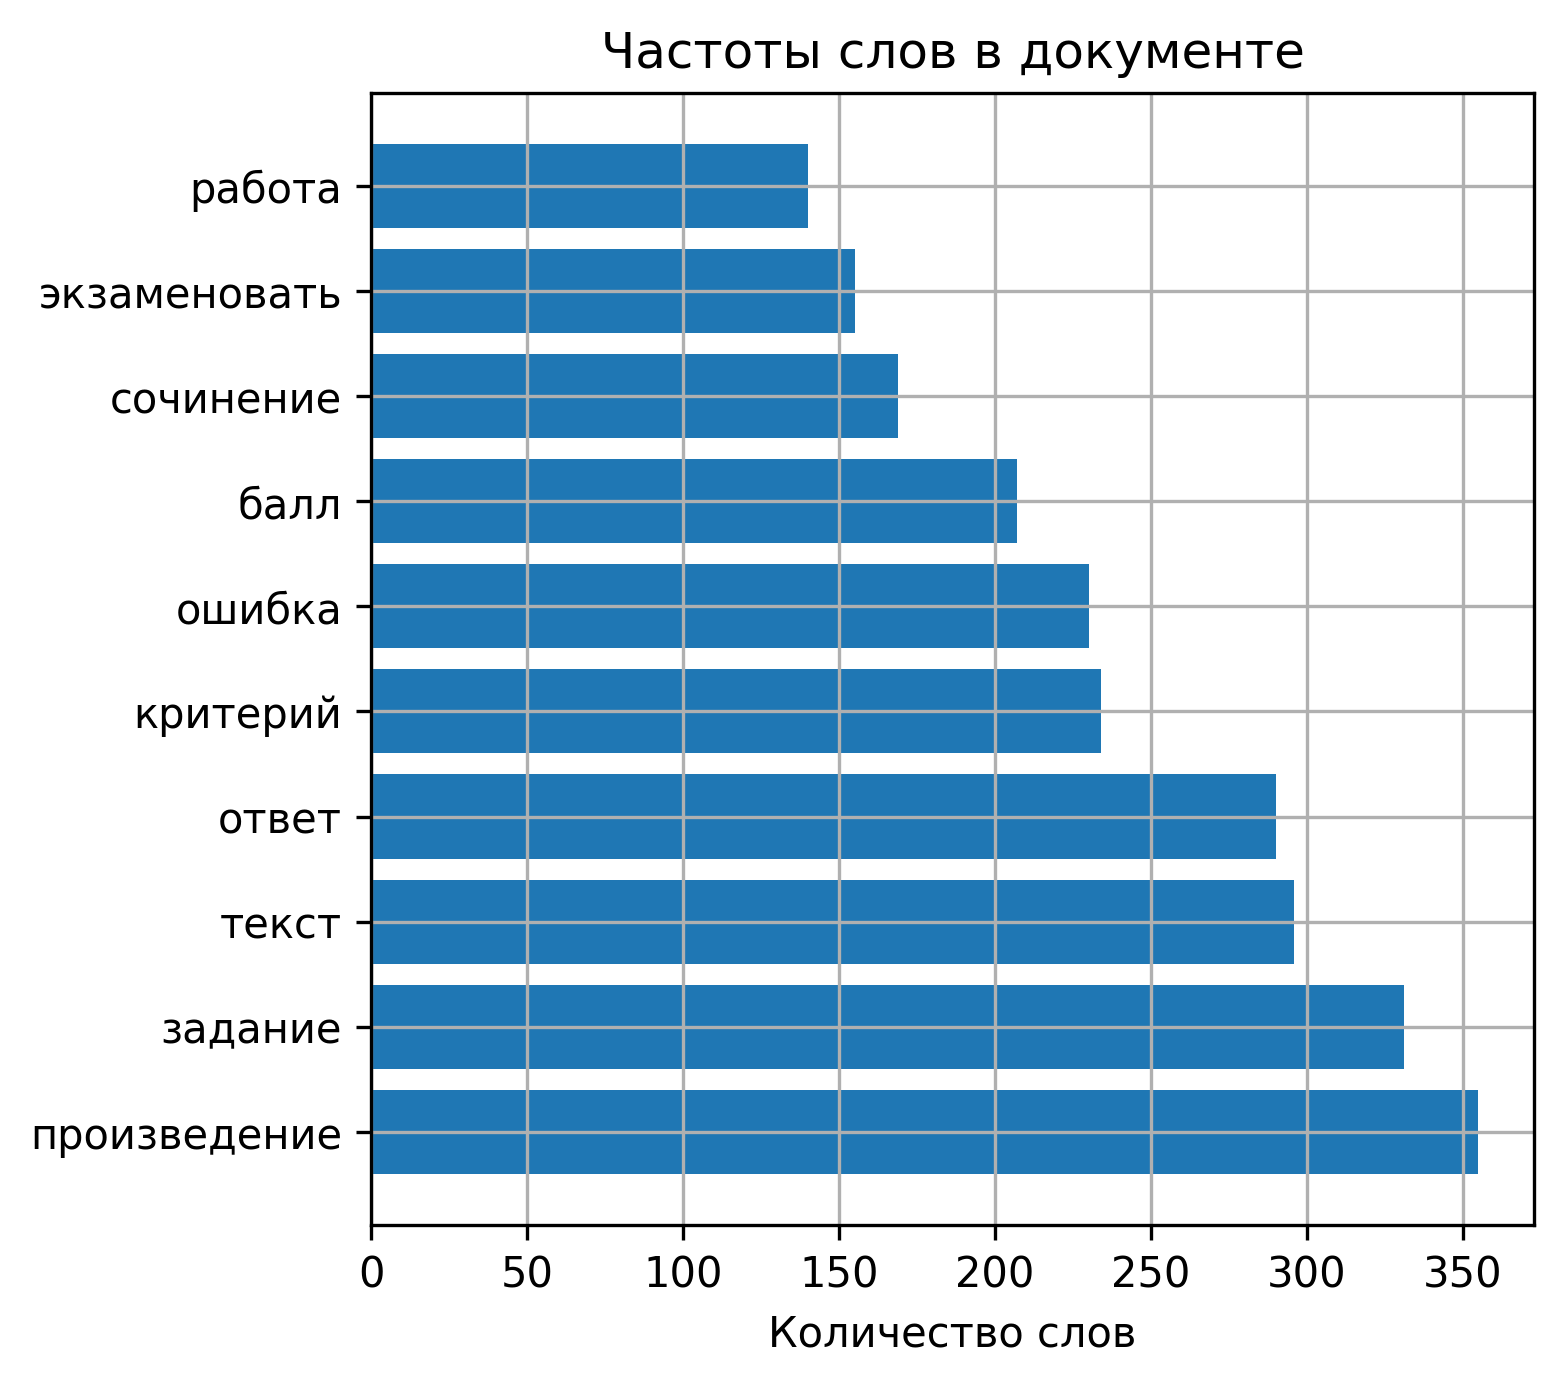

doc_for_TM/txt/15.txt


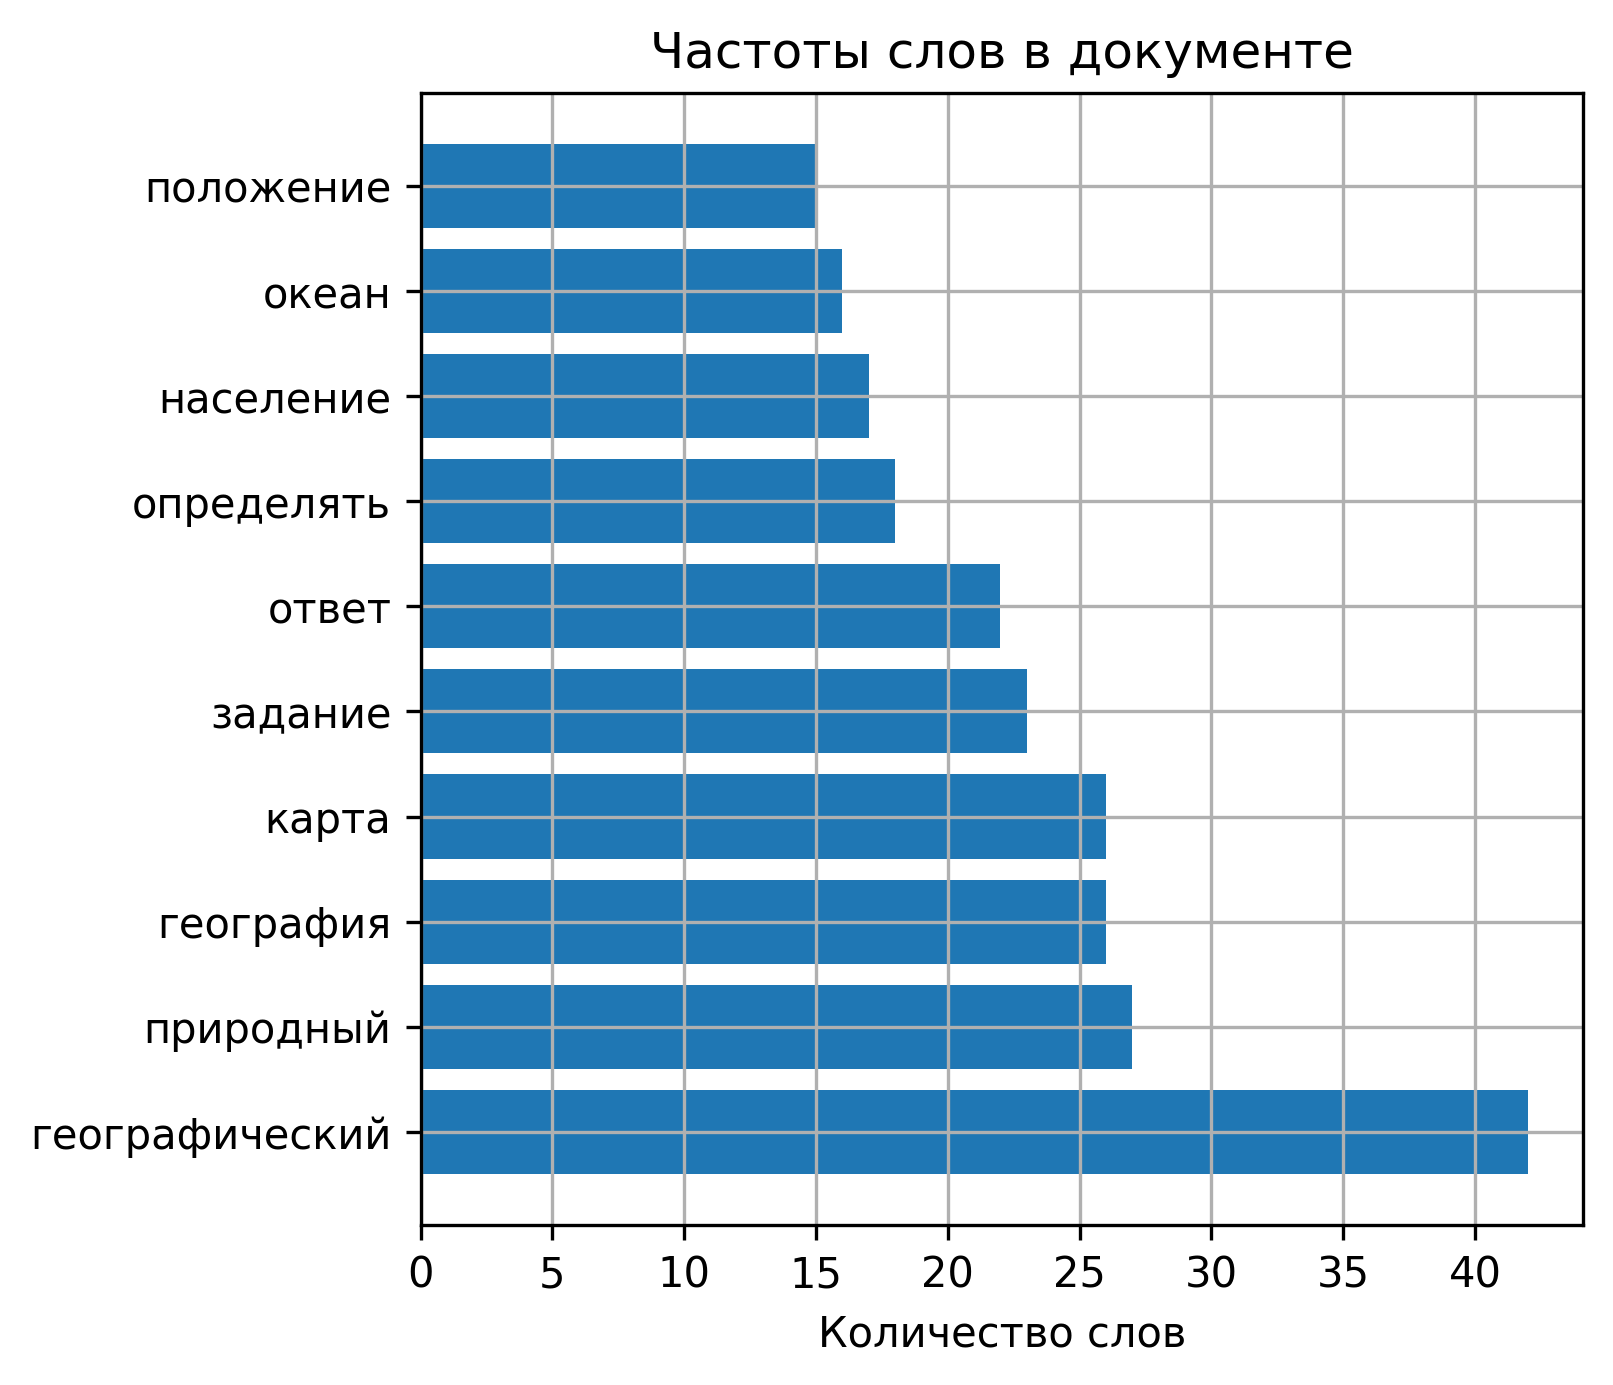

doc_for_TM/txt/16.txt


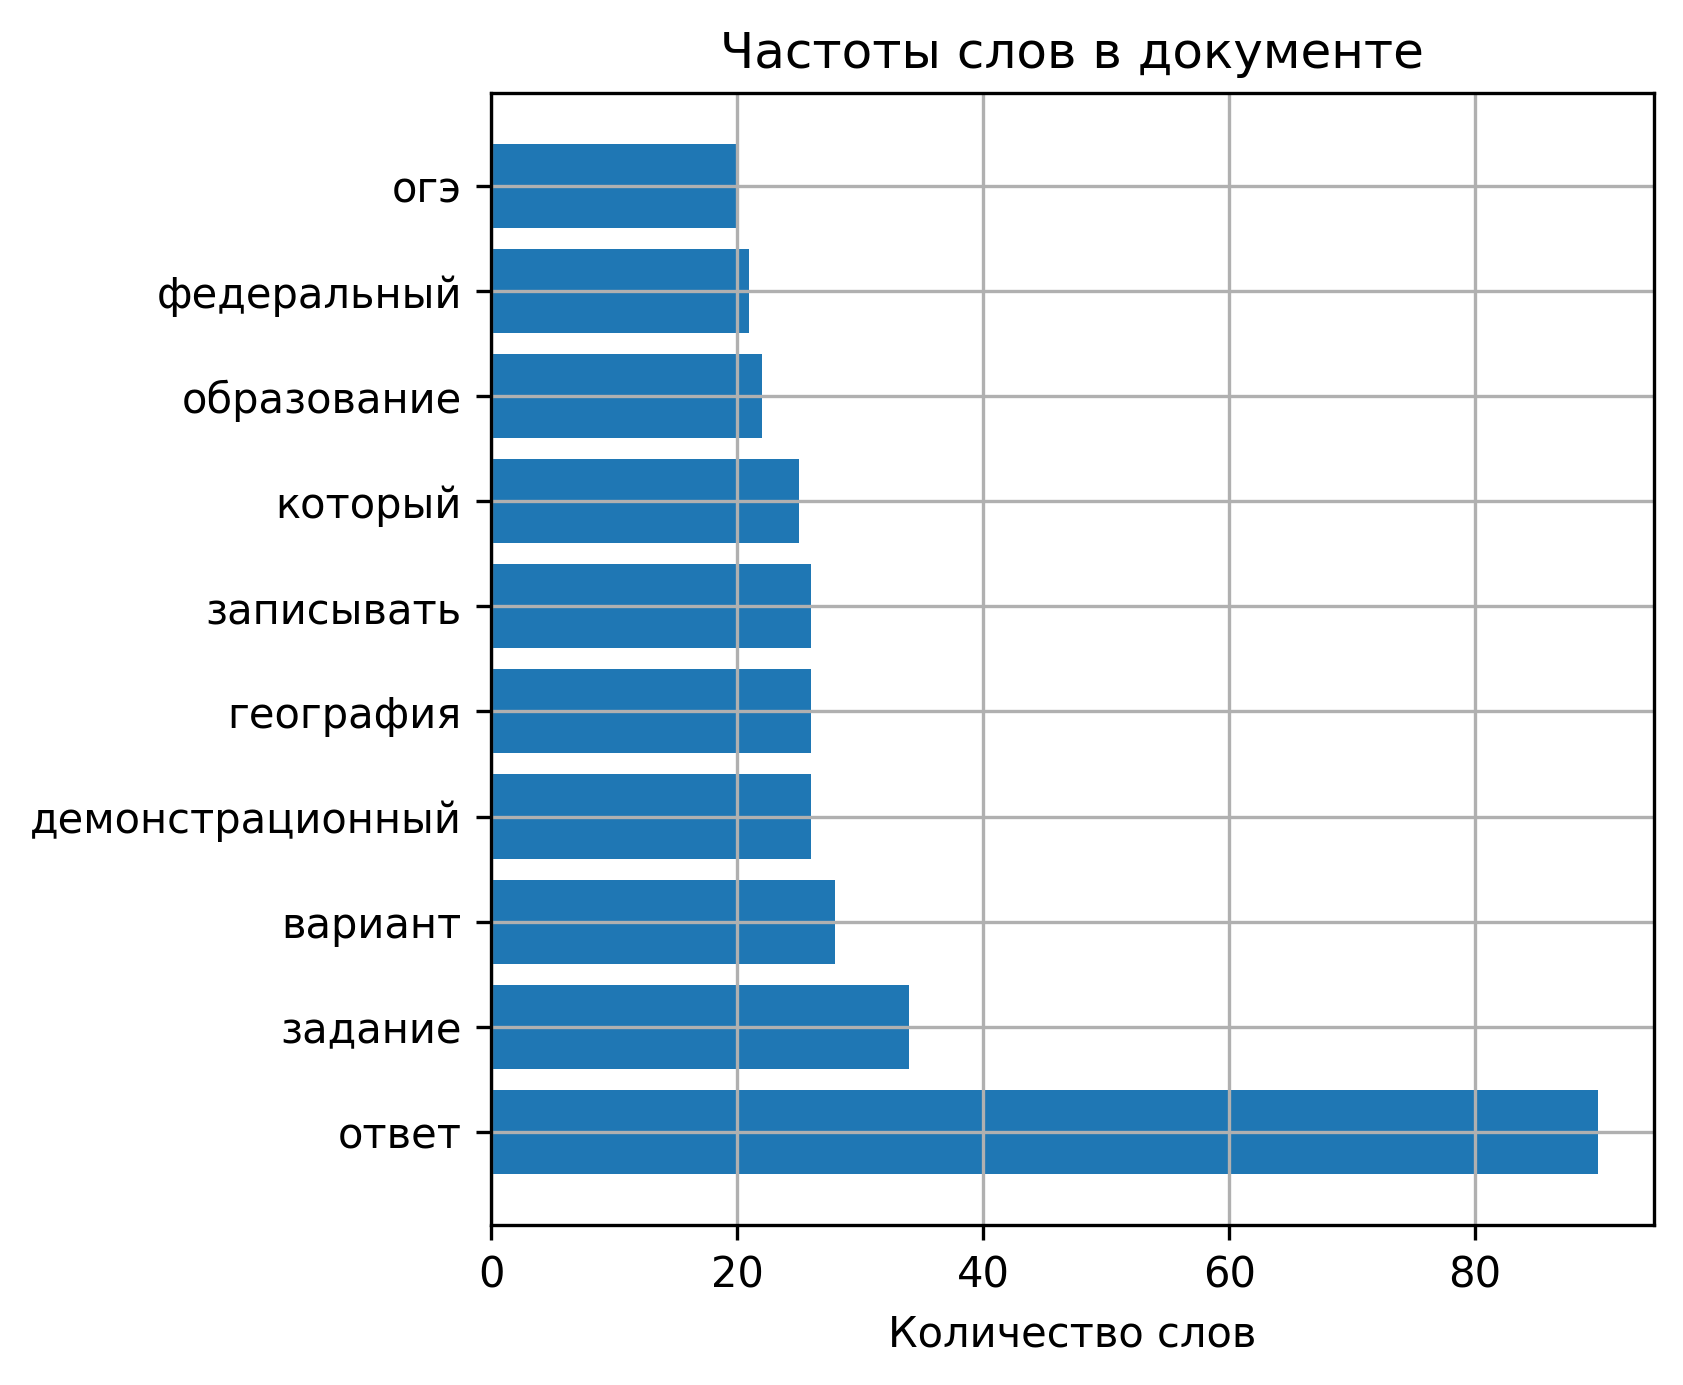

doc_for_TM/txt/17.txt


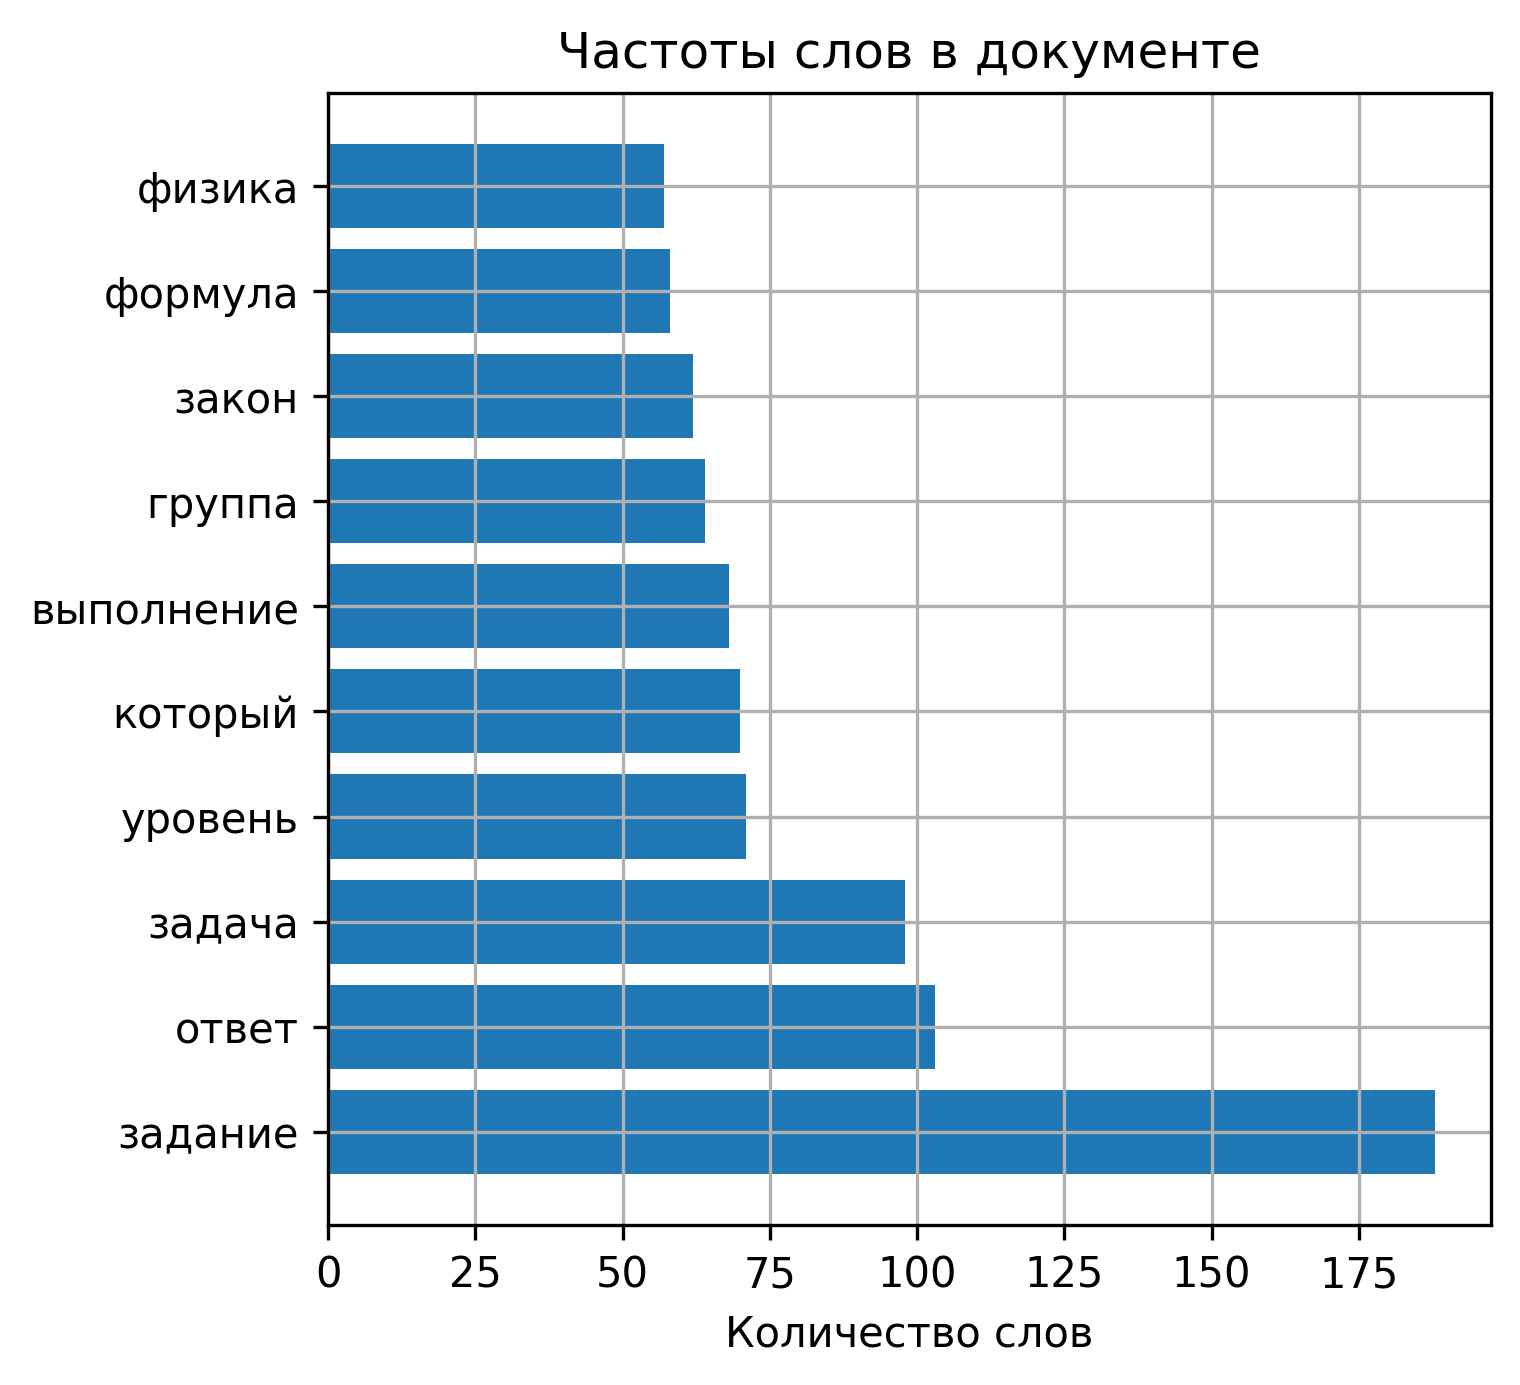

doc_for_TM/txt/18.txt


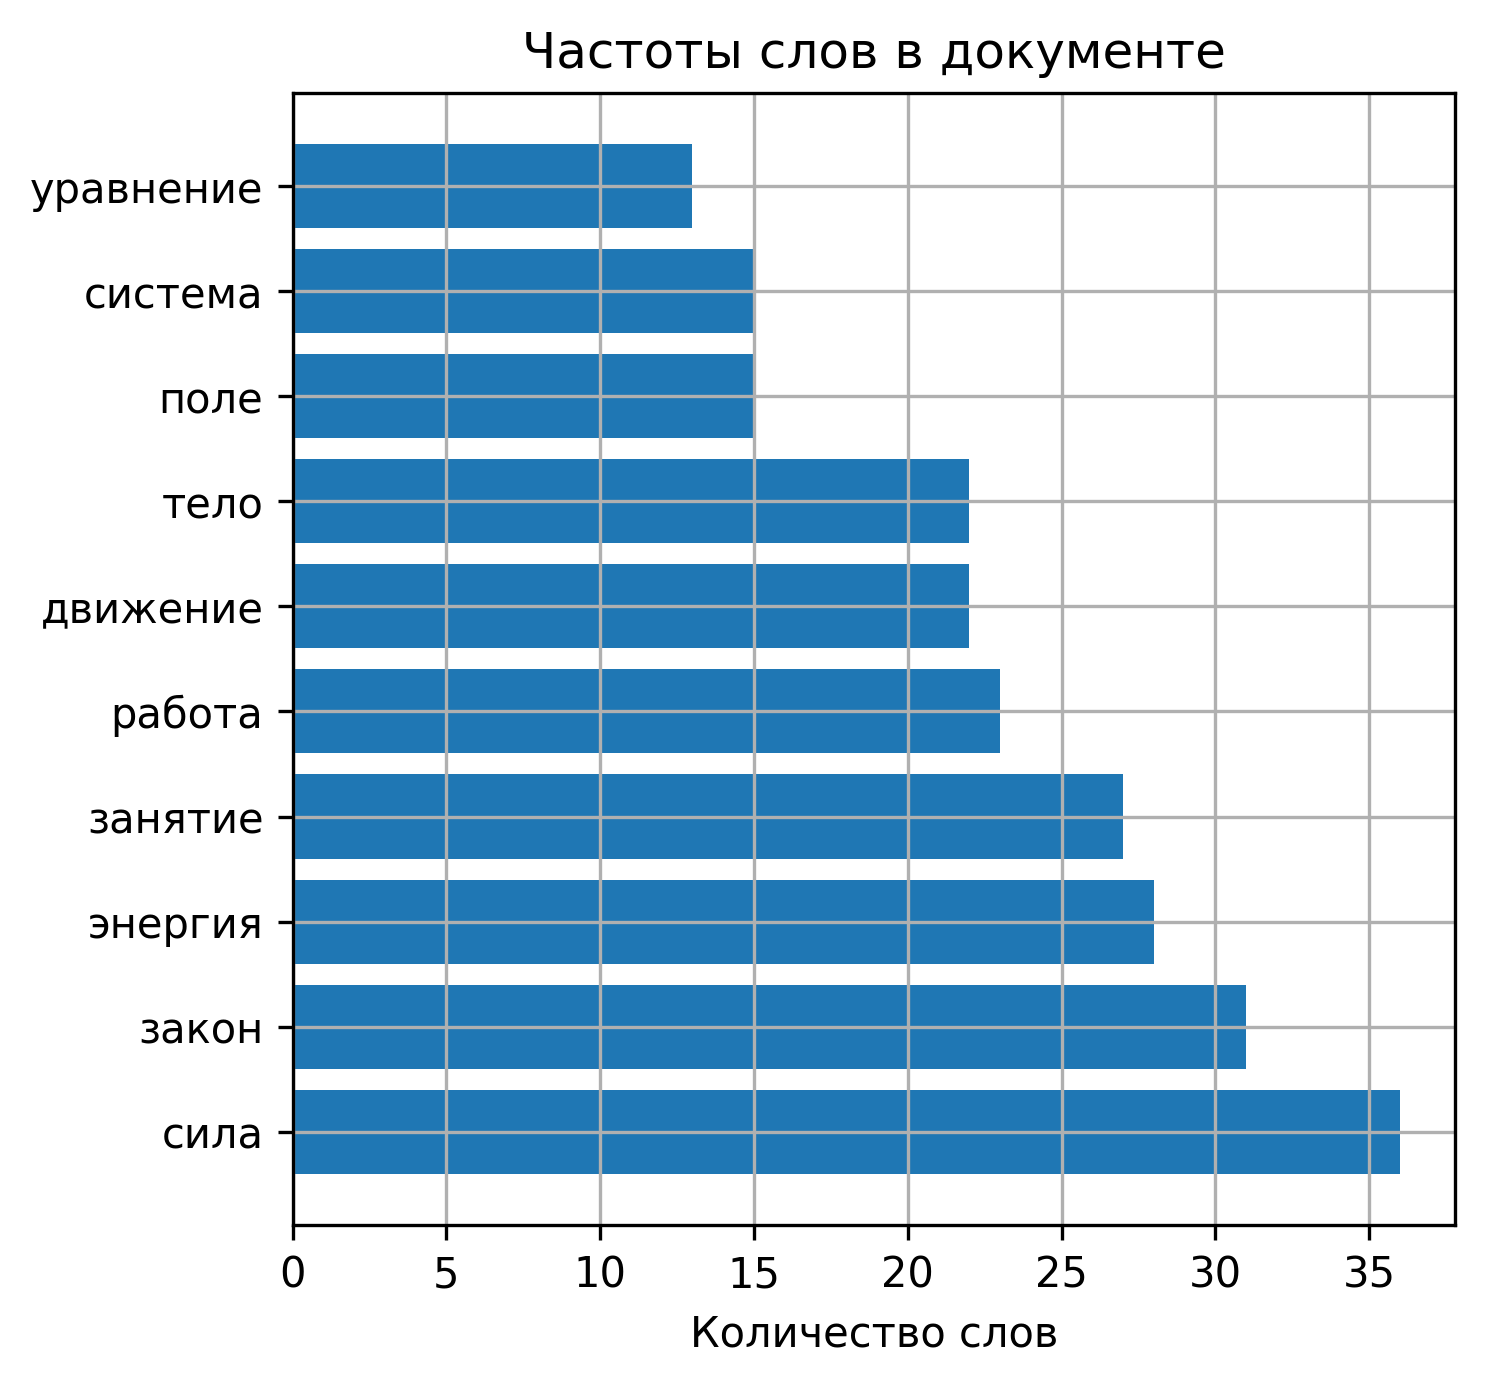

doc_for_TM/txt/19.txt


FileNotFoundError: [Errno 2] No such file or directory: 'doc_for_TM/txt/19.txt'

In [57]:

for i in range(len(os.listdir(path))): #перебор файлов с документами по номерам i
    filename='doc_for_TM/txt/'+str(i+1)+".txt"
    print(filename)
    text=" "      
    with codecs.open(filename, encoding = 'UTF-8') as file_object:# сбор текста из файла i-го документа             
        for line in file_object:
                if len(line)!=0:
                    text=text+" "+line                        
    word=nltk.word_tokenize(text)# токинезация текста i-го документа      
    word_ws=[w.lower()  for w in   word if w.isalpha() ]#исключение слов и символов      
    word_w=[w for w in word_ws if w not in stop_words ]#нижний регистр  
    lem = mystem . lemmatize ((" ").join(word_w))# лемматизация i -го документа
    lema=[w for w in lem if w.isalpha() and len(w)>1]
    freq=nltk.FreqDist(lema)# распределение слов в i -м документе по частоте
    z=[]# обновление списка для нового документа
    z=[(key+":"+str(val)) for key,val in freq.items() if val>1] # частота упоминания через : от слова    
    f.write("|text" +" "+(" ").join(z)+'\n')#.encode('utf-8') запись в мешок слов с меткой |text          
    c=[];d=[]
    for key,val in freq.items():#подготовка к сортировке слов по убыванию частоты в i -м документе
        if val>1:
                c.append(val); d.append(key)
    a=[];b=[]    
    for k in np.arange(0,len(c),1):#сортировка слов по убыванию частоты в i -м документе 
        ind=c.index(max(c));  a.append(c[ind])
        b.append(d[ind]); del c[ind]; del d[ind]
    x.append(i)#список номеров документов
    y.append(len(a))#список количества слов в документах     
    a=a[0:10];b=b[0:10]# TOP-10 для частот a  и слов b в i -м документе    
    y_pos = np.arange(1,len(a)+1,1)#построение TOP-10 диаграмм      
    performance =a
    fig = plt.figure(figsize=(5,5), dpi=300)
    plt.barh(y_pos, a)
    plt.yticks(y_pos, b)
    plt.xlabel(u'Количество слов')
    plt.title(u'Частоты слов в документе', size=12)
    plt.grid(True)
    plt.show()         
plt.title(u'Количество слов в документах', size=12)
plt.xlabel(u'Номера документов', size=12)
plt.ylabel(u'Количество слов', size=12)

plt.bar(x,y, 1)
plt.grid(True)

plt.show()
f.close()  


In [1065]:
# Смотрим конкретный файл
path='doc_for_TM'
f=open('1_file.txt','a')

filename=path+'/'+"1.txt"
    
text=" "   
with codecs.open(filename, encoding = 'UTF-8') as file_object:# сбор текста из файла i-го документа             
    for line in file_object:
            if len(line)!=0:
                text=text+" "+line                        
    word=nltk.word_tokenize(text)# токинезация текста i-го документа 
    #print(word)
    #print('!!!!!!!!!!')
    word_ws=[w.lower()  for w in   word if w.isalpha() ]#исключение слов и символов
    #print(word)
    word_w=[w for w in word_ws if w not in stop_words ]#нижний регистр  
    lem = mystem . lemmatize ((" ").join(word_w))# лемматизация i -го документа
    lema=[w for w in lem if w.isalpha() and len(w)>1]
    #print(lema)
    freq=nltk.FreqDist(lemma)# распределение слов в i -м документе по частоте
    z=[]# обновление списка для нового документа
    z=[(key+":"+str(val)) for key,val in freq.items() if val>1] # частота упоминания через : от слова    
    f.write("|text" +" "+(" ").join(z)+'n')#.encode('utf-8') запись в мешок слов с меткой |text
    
    c=[];d=[]
    for key,val in freq.items():#подготовка к сортировке слов по убыванию частоты в i -м документе
        if val>1:
                c.append(val); d.append(key)
    a=[];b=[]    
    for k in np.arange(0,len(c),1):#сортировка слов по убыванию частоты в i -м документе 
        ind=c.index(max(c));  a.append(c[ind])
        b.append(d[ind]+':'+str(c[ind])); del c[ind]; del d[ind]
        
f.close()

In [1066]:
# Мешок слов для первого файла
b

['клетка:55',
 'деление:31',
 'хромосома:31',
 'мейоз:18',
 'митоз:15',
 'дочерний:14',
 'организм:14',
 'процесс:13',
 'образовываться:13',
 'половой:13',
 'происходить:11',
 'развитие:9',
 'результат:9',
 'два:9',
 'размножение:9',
 'число:8',
 'один:7',
 'диплоидный:7',
 'состоять:6',
 'интерфаза:6',
 'набор:6',
 'образование:6',
 'веретено:6',
 'делиться:6',
 'второй:6',
 'порядок:6',
 'клеточный:5',
 'рост:5',
 'днк:5',
 'амитоз:5',
 'ядерный:5',
 'репликация:5',
 'оболочка:5',
 'нить:5',
 'полюс:5',
 'многоклеточный:5',
 'каждый:5',
 'хроматида:5',
 'гомологичный:5',
 'цикл:4',
 'материал:4',
 'материнский:4',
 'содержать:4',
 'количество:4',
 'спирализация:4',
 'ядро:4',
 'анафаза:4',
 'цитоплазма:4',
 'формироваться:4',
 'такой:4',
 'первый:4',
 'благодаря:4',
 'яйцеклетка:4',
 'основа:4',
 'приводить:4',
 'время:3',
 'удвоение:3',
 'наследственный:3',
 'генетический:3',
 'одноклеточный:3',
 'стадия:3',
 'фаза:3',
 'профаза:3',
 'уменьшение:3',
 'метафаза:3',
 'экваториальный:3

### Тематическое моделирование с помощью BigARTM

In [5]:
# создаем объект BatchVectorizer:
batch_vectorizer = artm.BatchVectorizer(data_path='new.txt', data_format='vowpal_wabbit',target_folder='batch_for_lictures',batch_size=100)



In [6]:
# повторяем BatchVectorizer
batch_vectorizer = artm.BatchVectorizer(data_path='batch_for_lictures', data_format='batches')

In [9]:
# Создаем словарь
dictionary = artm.Dictionary()

In [14]:
if not os.path.isfile('batch_for_lictures/dictionary.dict'):
    dictionary.gather(data_path=batch_vectorizer.data_path)
    dictionary.save(dictionary_path='batch_for_lictures/dictionary.dict')

dictionary.load(dictionary_path='batch_for_lictures/dictionary.dict')
dictionary.load(dictionary_path='batch_for_lictures/dictionary.dict')

In [15]:
dictionary.save_text(dictionary_path='batch_for_lictures/my_dictionary.txt')

In [17]:
#Затем словари можно использовать, чтобы инициализировать модель:
model.initialize(dictionary=dictionary)

In [16]:
# Создаем модель BigARTM
model= artm.ARTM(num_topics=6,
                  num_document_passes=25,#10 проходов по документу
                  dictionary=dictionary,
                    #topic_names=['topic_{}'.format(i) for i in xrange(15)],
                    scores=[artm.TopTokensScore(name='TopTokensScore'),artm.PerplexityScore(name='PerplexityScore',
                                                    #use_unigram_document_model=False,
                                                    dictionary=dictionary)],
                       #regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=0.5)],
                       cache_theta=True)


In [18]:
model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3))

In [19]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

In [20]:
import matplotlib.pyplot as plt

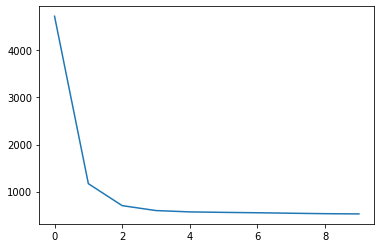

In [21]:
# Значение перплексии от проходов
plt.plot(model.score_tracker['PerplexityScore'].value)


In [28]:
model.score_tracker['PerplexityScore'].last_value

517.6441650390625

In [29]:
# ТОП-слова по шести темам (Биология, История, Русский, Физика, Литература, Геометрия)
for topic_name in model.topic_names:
    print (topic_name + ': ',)
    print (model.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0: 
['находить', 'равный', 'см', 'основание', 'треугольник', 'сторона', 'площадь', 'угол', 'пирамида', 'окружность']
topic_1: 
['русский', 'князь', 'война', 'великий', 'московский', 'москва', 'сын', 'россия', 'иван', 'петр']
topic_2: 
['клетка', 'эталон', 'хромосома', 'деление', 'указывать', 'организм', 'мейоз', 'растение', 'митоз', 'бактерия']
topic_3: 
['ответ', 'задание', 'география', 'образование', 'географический', 'федеральный', 'россия', 'записывать', 'работа', 'государственный']
topic_4: 
['произведение', 'текст', 'критерий', 'балл', 'сочинение', 'экзаменовать', 'стихотворение', 'литература', 'тема', 'выпускник']
topic_5: 
['задача', 'ответ', 'движение', 'закон', 'сила', 'скорость', 'решение', 'время', 'sin', 'уровень']


In [30]:
model.score_tracker['SparsityPhiScore'].last_value

0.7401270270347595

In [31]:
model.score_tracker['SparsityThetaScore'].last_value

0.7129629850387573

In [26]:
model.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.01))


In [503]:
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.001))

In [113]:
model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=1.2e+4))

In [497]:
model.regularizers['SparseTheta'].tau = -2.001


In [376]:
model.regularizers['SparsePhi'].tau=-0.0001

In [446]:
model.regularizers['DecorrelatorPhi'].tau=2.2e+4

In [27]:
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=18)

In [33]:
phi=model.get_phi()
phi

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
суперпозиция,0.000000,0.000000,0.000000,0.0,0.000000,0.000229
совершение,0.000000,0.000000,0.000000,0.0,0.000000,0.000229
сгорание,0.000000,0.000000,0.000000,0.0,0.000000,0.000229
плавление,0.000000,0.000000,0.000000,0.0,0.000000,0.000229
полноценный,0.000000,0.000000,0.000000,0.0,0.000000,0.000457
...,...,...,...,...,...,...
др,0.000000,0.000962,0.000000,0.0,0.000347,0.000000
заранее,0.000000,0.000000,0.000000,0.0,0.000116,0.000000
образующая,0.002071,0.000000,0.000000,0.0,0.000000,0.000000
неточность,0.000000,0.000000,0.004005,0.0,0.000521,0.000000


In [34]:
theta=model.get_theta()
theta

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
topic_0,0.000000,0.000000,0.960702,0.000000,0.00076,0.0,0.0,0.0,0.0,0.0,0.003858,1.0,1.0,0.0,0.0,0.0,0.0,0.0
topic_1,0.000000,0.154221,0.000000,0.463493,0.00000,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic_2,0.000000,0.000000,0.000312,0.000000,0.00000,1.0,0.0,1.0,0.0,0.0,0.794632,0.0,0.0,0.0,0.0,0.0,0.0,0.0
topic_3,0.264752,0.845779,0.006392,0.045679,0.00000,0.0,1.0,0.0,0.0,0.0,0.002185,0.0,0.0,0.0,1.0,1.0,0.0,0.0
topic_4,0.735248,0.000000,0.000000,0.490042,0.00000,0.0,0.0,0.0,0.0,0.0,0.097294,0.0,0.0,1.0,0.0,0.0,0.0,0.0
topic_5,0.000000,0.000000,0.032594,0.000786,0.99924,0.0,0.0,0.0,0.0,0.0,0.102030,0.0,0.0,0.0,0.0,0.0,1.0,1.0
